## Exploring our dataset :

In this part of the project, we will get more familair wiht our data, perform data wrangling and exploratory data analysis as grasping the intricacies of our data is crucial to eventually perform the differnt classification algortihms.


In [327]:
import pandas as pd
print(f'[POLLARS VERSION] == {pd.__version__}')

[POLLARS VERSION] == 2.2.1


In [328]:
df = pd.read_csv('../../data/AQI_data.csv')
df

Country              City  AQI Value AQI Category  \
0            Russian Federation        Praskoveya         51     Moderate   
1                        Brazil  Presidente Dutra         41         Good   
2                        Brazil  Presidente Dutra         41         Good   
3                         Italy   Priolo Gargallo         66     Moderate   
4                        Poland         Przasnysz         34         Good   
...                         ...               ...        ...          ...   
16690  United States of America  Highland Springs         54     Moderate   
16691                  Slovakia            Martin         71     Moderate   
16692                  Slovakia            Martin         71     Moderate   
16693                    France            Sceaux         50         Good   
16694  United States of America       Westerville         71     Moderate   

       CO AQI Value CO AQI Category  Ozone AQI Value Ozone AQI Category  \
0                 1            Good               36               Good   
1                 1            Good                5               Good   
2                 1            Good                5               Good   
3                 1            Good               39               Good   
4                 1            Good               34               Good   
...             ...             ...              ...                ...   
16690             1            Good               34               Good   
16691             1            Good               39               Good   
16692             1            Good               39               Good   
16693             1            Good               20               Good   
16694             1            Good               44               Good   

       NO2 AQI Value NO2 AQI Category  PM2.5 AQI Value PM2.5 AQI Category  \
0                  0             Good               51           Moderate   
1                  1             Good               41               Good   
2                  1             Good               41               Good   
3                  2             Good               66           Moderate   
4                  0             Good               20               Good   
...              ...              ...              ...                ...   
16690              5             Good               54           Moderate   
16691              1             Good               71           Moderate   
16692              1             Good               71           Moderate   
16693              5             Good               50               Good   
16694              2             Good               71           Moderate   

           lat      lng  
0      44.7444  44.2031  
1      -5.2900 -44.4900  
2     -11.2958 -41.9869  
3      37.1667  15.1833  
4      53.0167  20.8833  
...        ...      ...  
16690  37.5516 -77.3285  
16691  49.0650  18.9219  
16692  36.3385 -88.8513  
16693  48.7786   2.2906  
16694  40.1241 -82.9210  

[16695 rows x 14 columns]

### 1. Understanding the data structure

In [329]:
# get the dimensionality of our df
print(f"THE SHAPE OF OUR DATAFRAME == {df.shape}")
print(f"WE HAVE {df.shape[0] } ROWS AND {df.shape[1]} COLUMNS ")

THE SHAPE OF OUR DATAFRAME == (16695, 14)
WE HAVE 16695 ROWS AND 14 COLUMNS 


In [330]:
# View the top 10 rows of our df
df.tail(10)

Country              City  \
16685                                           Colombia           Viterbo   
16686                                              China          Wangqing   
16687                           United States of America           El Reno   
16688  United Kingdom of Great Britain and Northern I...           Urmston   
16689                                              China          Shaoguan   
16690                           United States of America  Highland Springs   
16691                                           Slovakia            Martin   
16692                                           Slovakia            Martin   
16693                                             France            Sceaux   
16694                           United States of America       Westerville   

       AQI Value                    AQI Category  CO AQI Value  \
16685         55                        Moderate             1   
16686        101  Unhealthy for Sensitive Groups             3   
16687         39                            Good             1   
16688         33                            Good             1   
16689        160                       Unhealthy             3   
16690         54                        Moderate             1   
16691         71                        Moderate             1   
16692         71                        Moderate             1   
16693         50                            Good             1   
16694         71                        Moderate             1   

      CO AQI Category  Ozone AQI Value Ozone AQI Category  NO2 AQI Value  \
16685            Good               24               Good              0   
16686            Good               35               Good              2   
16687            Good               39               Good              1   
16688            Good               30               Good              3   
16689            Good              160          Unhealthy              1   
16690            Good               34               Good              5   
16691            Good               39               Good              1   
16692            Good               39               Good              1   
16693            Good               20               Good              5   
16694            Good               44               Good              2   

      NO2 AQI Category  PM2.5 AQI Value              PM2.5 AQI Category  \
16685             Good               55                        Moderate   
16686             Good              101  Unhealthy for Sensitive Groups   
16687             Good               35                            Good   
16688             Good               33                            Good   
16689             Good               79                        Moderate   
16690             Good               54                        Moderate   
16691             Good               71                        Moderate   
16692             Good               71                        Moderate   
16693             Good               50                            Good   
16694             Good               71                        Moderate   

           lat       lng  
16685   5.0667  -75.8833  
16686  43.3126  129.7572  
16687  35.5429  -97.9660  
16688  53.4487   -2.3747  
16689  24.8011  113.5927  
16690  37.5516  -77.3285  
16691  49.0650   18.9219  
16692  36.3385  -88.8513  
16693  48.7786    2.2906  
16694  40.1241  -82.9210

In [331]:
# check the data types of each column
for col, dtype in zip(df.columns, df.dtypes):
    print(f"COLUMN: {col}  -> DATATYPE : {dtype}")

COLUMN: Country  -> DATATYPE : object
COLUMN: City  -> DATATYPE : object
COLUMN: AQI Value  -> DATATYPE : int64
COLUMN: AQI Category  -> DATATYPE : object
COLUMN: CO AQI Value  -> DATATYPE : int64
COLUMN: CO AQI Category  -> DATATYPE : object
COLUMN: Ozone AQI Value  -> DATATYPE : int64
COLUMN: Ozone AQI Category  -> DATATYPE : object
COLUMN: NO2 AQI Value  -> DATATYPE : int64
COLUMN: NO2 AQI Category  -> DATATYPE : object
COLUMN: PM2.5 AQI Value  -> DATATYPE : int64
COLUMN: PM2.5 AQI Category  -> DATATYPE : object
COLUMN: lat  -> DATATYPE : float64
COLUMN: lng  -> DATATYPE : float64


In [332]:
# get general information about the data
df.describe()

AQI Value  CO AQI Value  Ozone AQI Value  NO2 AQI Value  \
count  16695.000000  16695.000000     16695.000000   16695.000000   
mean      62.998682      1.342138        31.767355       3.819647   
std       43.091971      2.371379        22.839343       5.880677   
min        7.000000      0.000000         0.000000       0.000000   
25%       38.500000      1.000000        20.000000       0.000000   
50%       52.000000      1.000000        29.000000       2.000000   
75%       69.000000      1.000000        38.000000       5.000000   
max      500.000000    133.000000       222.000000      91.000000   

       PM2.5 AQI Value           lat           lng  
count     16695.000000  16695.000000  16695.000000  
mean         59.821324     30.267148     -3.944485  
std          43.208298     22.947398     73.037148  
min           0.000000    -54.801900   -171.750000  
25%          34.000000     16.515450    -75.180000  
50%          52.000000     38.815800      5.643100  
75%          69.000000     46.683300     36.275000  
max         500.000000     70.767000    178.017800

In [333]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16695 entries, 0 to 16694
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             16393 non-null  object 
 1   City                16695 non-null  object 
 2   AQI Value           16695 non-null  int64  
 3   AQI Category        16695 non-null  object 
 4   CO AQI Value        16695 non-null  int64  
 5   CO AQI Category     16695 non-null  object 
 6   Ozone AQI Value     16695 non-null  int64  
 7   Ozone AQI Category  16695 non-null  object 
 8   NO2 AQI Value       16695 non-null  int64  
 9   NO2 AQI Category    16695 non-null  object 
 10  PM2.5 AQI Value     16695 non-null  int64  
 11  PM2.5 AQI Category  16695 non-null  object 
 12  lat                 16695 non-null  float64
 13  lng                 16695 non-null  float64
dtypes: float64(2), int64(5), object(7)
memory usage: 1.8+ MB


### Handling missing and duplicated values

In [334]:
df.isnull().sum()
# we have no missing values youpii :)

Country               302
City                    0
AQI Value               0
AQI Category            0
CO AQI Value            0
CO AQI Category         0
Ozone AQI Value         0
Ozone AQI Category      0
NO2 AQI Value           0
NO2 AQI Category        0
PM2.5 AQI Value         0
PM2.5 AQI Category      0
lat                     0
lng                     0
dtype: int64

In [335]:
duplicated_cities = df.duplicated(subset=['City', 'Country'])
print(f'THE NUMBER OF DUPLICATED CITIES : {duplicated_cities.sum()}')

THE NUMBER OF DUPLICATED CITIES : 2466


In [336]:
duped = df[duplicated_cities].sort_values(by='City')
duped

Country           City  AQI Value AQI Category  \
10545                    Mexico        Abasolo         53     Moderate   
7128                 Kazakhstan           Abay         42         Good   
15802  United States of America      Abbeville         41         Good   
8081   United States of America       Aberdeen         39         Good   
8082   United States of America       Aberdeen         39         Good   
...                         ...            ...        ...          ...   
16155                    Mexico       Zaragoza         49         Good   
13463        Russian Federation      Zarechnyy         41         Good   
4483         Russian Federation  Zheleznogorsk         42         Good   
174                       China      Zhongshan         98     Moderate   
11405               Netherlands    Zwijndrecht         39         Good   

       CO AQI Value CO AQI Category  Ozone AQI Value Ozone AQI Category  \
10545             1            Good               28               Good   
7128              1            Good               35               Good   
15802             1            Good               23               Good   
8081              1            Good               39               Good   
8082              1            Good               39               Good   
...             ...             ...              ...                ...   
16155             1            Good               20               Good   
13463             1            Good               41               Good   
4483              1            Good               33               Good   
174               3            Good               33               Good   
11405             1            Good               39               Good   

       NO2 AQI Value NO2 AQI Category  PM2.5 AQI Value PM2.5 AQI Category  \
10545              3             Good               53           Moderate   
7128               0             Good               42               Good   
15802              2             Good               41               Good   
8081               1             Good               27               Good   
8082               1             Good               27               Good   
...              ...              ...              ...                ...   
16155              6             Good               49               Good   
13463              0             Good               28               Good   
4483               0             Good               42               Good   
174                9             Good               98           Moderate   
11405              1             Good               33               Good   

           lat       lng  
10545  24.0559  -98.3733  
7128   43.2092   76.7603  
15802  29.9751  -92.1265  
8081   45.4649  -98.4686  
8082   40.4165  -74.2249  
...        ...       ...  
16155  28.4869 -100.9175  
13463  56.8167   61.3333  
4483   56.2500   93.5333  
174    34.9430  105.8771  
11405  51.2167    4.3333  

[2466 rows x 14 columns]

In [337]:
# Now we drop the duplicated rows
df = df.drop_duplicates(subset=['City', 'Country'])
print(f'THE SHAPE OF THE DF AFTER CLEANING : {df.shape}')

THE SHAPE OF THE DF AFTER CLEANING : (14229, 14)


### Exploring categorical variables

In [338]:
df.reset_index(drop=True, inplace=True)
for col in df.columns:
    print(df[col].value_counts())

Country
United States of America    2777
Germany                     1040
Russian Federation           853
Italy                        845
Brazil                       784
                            ... 
Luxembourg                     1
Aruba                          1
Saint Kitts and Nevis          1
Qatar                          1
Monaco                         1
Name: count, Length: 174, dtype: int64
City
Westerville         1
Praskoveya          1
Presidente Dutra    1
Priolo Gargallo     1
Przasnysz           1
                   ..
Port Talbot         1
Portales            1
Post Falls          1
Pouso Alegre        1
Dalnegorsk          1
Name: count, Length: 14229, dtype: int64
AQI Value
50     339
35     331
54     311
52     303
34     302
      ... 
211      1
260      1
295      1
301      1
296      1
Name: count, Length: 282, dtype: int64
AQI Category
Good                              6670
Moderate                          5872
Unhealthy                          773
Un

In [339]:
# Let's see the top 5 dirtiest cities
sorted_df = df.sort_values(by="AQI Value")
sorted_df[["Country", "City", "AQI Value"]][:6]

Country        City  AQI Value
5617            Ecuador       Macas          7
14110  Papua New Guinea        Tari          8
8879            Ecuador     Azogues          8
4609               Peru      Huaraz          9
2207            Ecuador  Nueva Loja         10
5855          Indonesia   Manokwari         10

In [340]:
# Let's see the top 5 cleanest cities
sorted_df.tail(6)[["Country", "City", "AQI Value"]]

Country          City  AQI Value
5024      India    Sardulgarh        500
180    Pakistan  Bahawalnagar        500
4387      India        Rohtak        500
382    Pakistan     Harunabad        500
495       India  Mahendragarh        500
10800     India        Malaut        500

### Data Visualization :

In [341]:
%pip install seaborn
%pip install pyarrow

Defaulting to user installation because normal site-packages is not writeable


Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [342]:
import matplotlib.pyplot as plt
import seaborn as sns

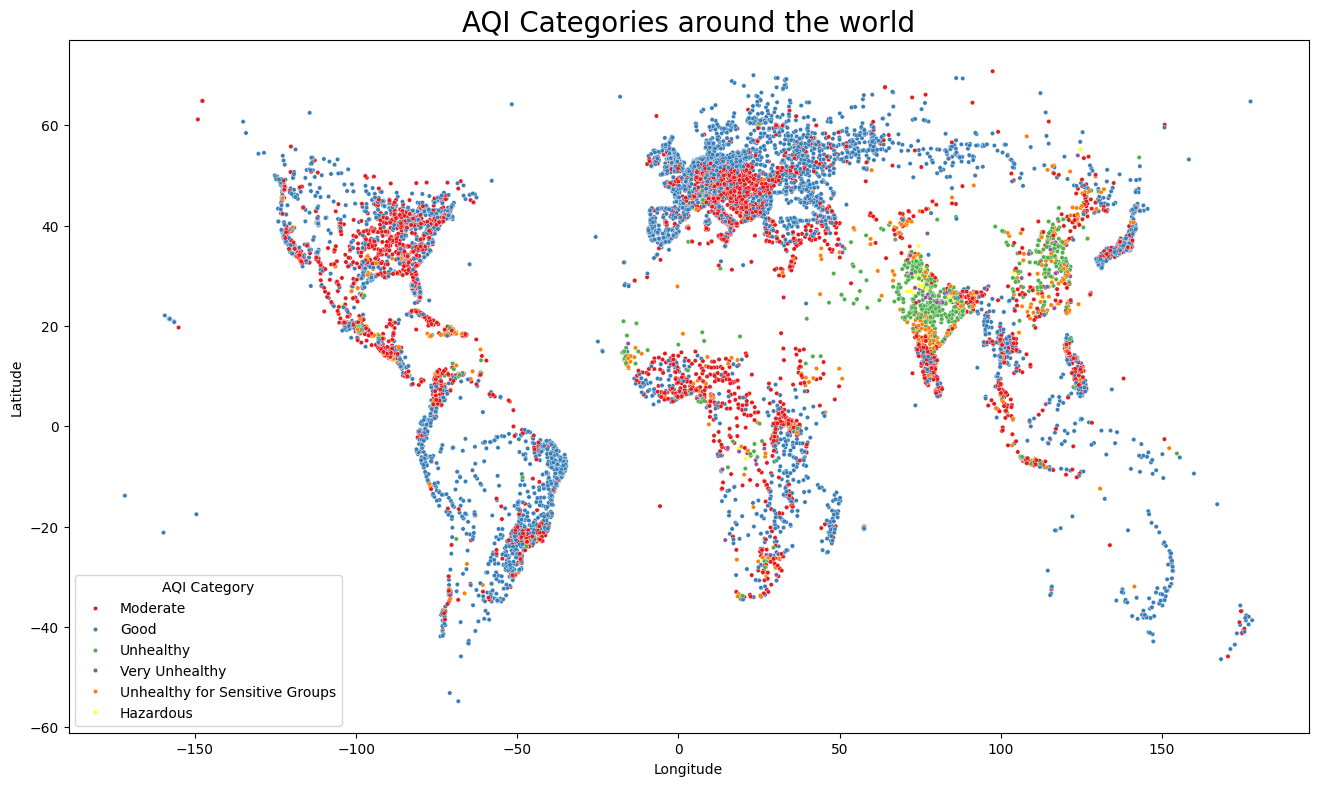

In [343]:
# Let's visualize the label of the AQI for each country in the dataset
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df, x="lng", y="lat", hue="AQI Category", palette="Set1", s=10)
plt.title("AQI Categories around the world", fontsize=20)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

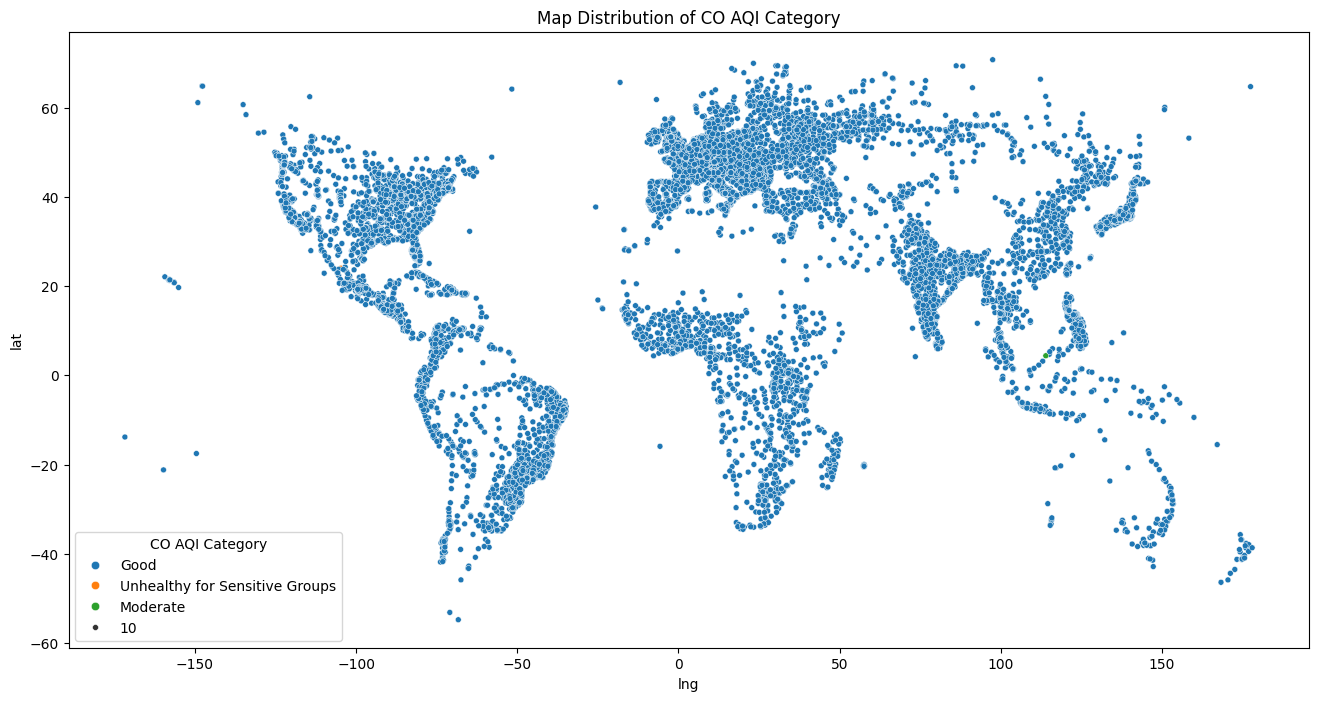

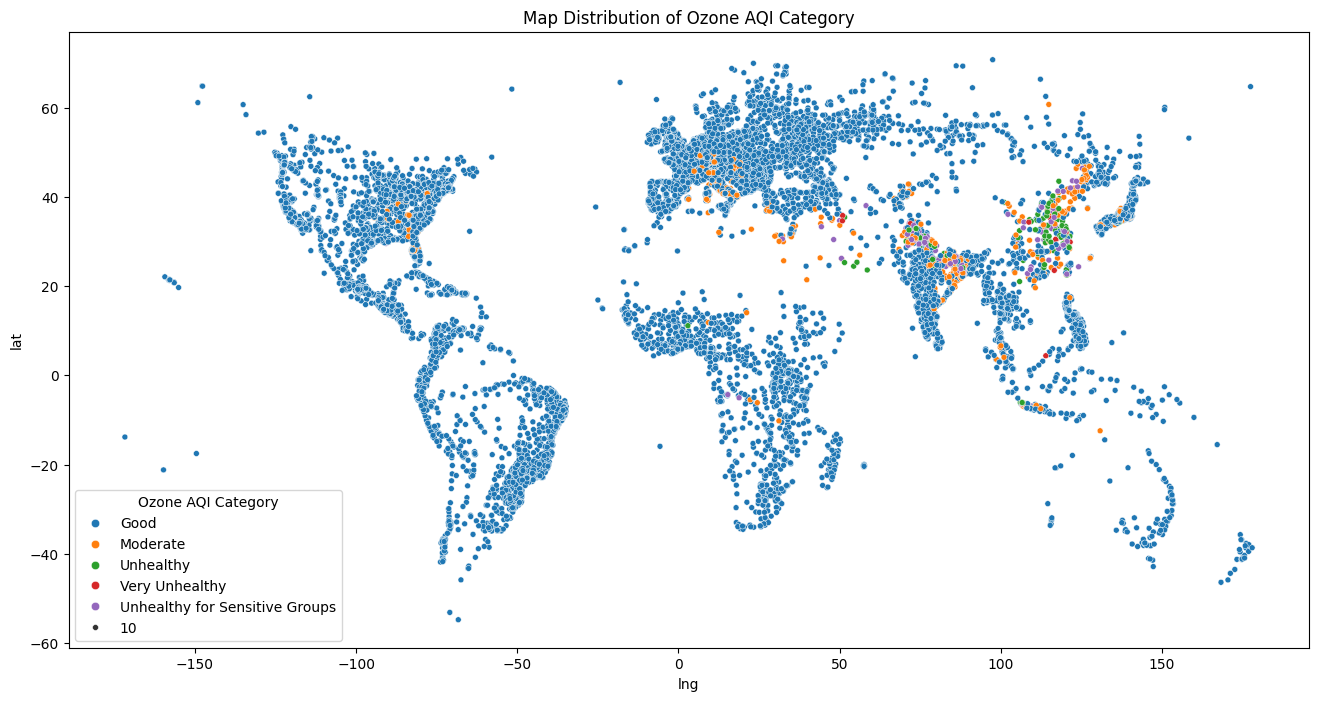

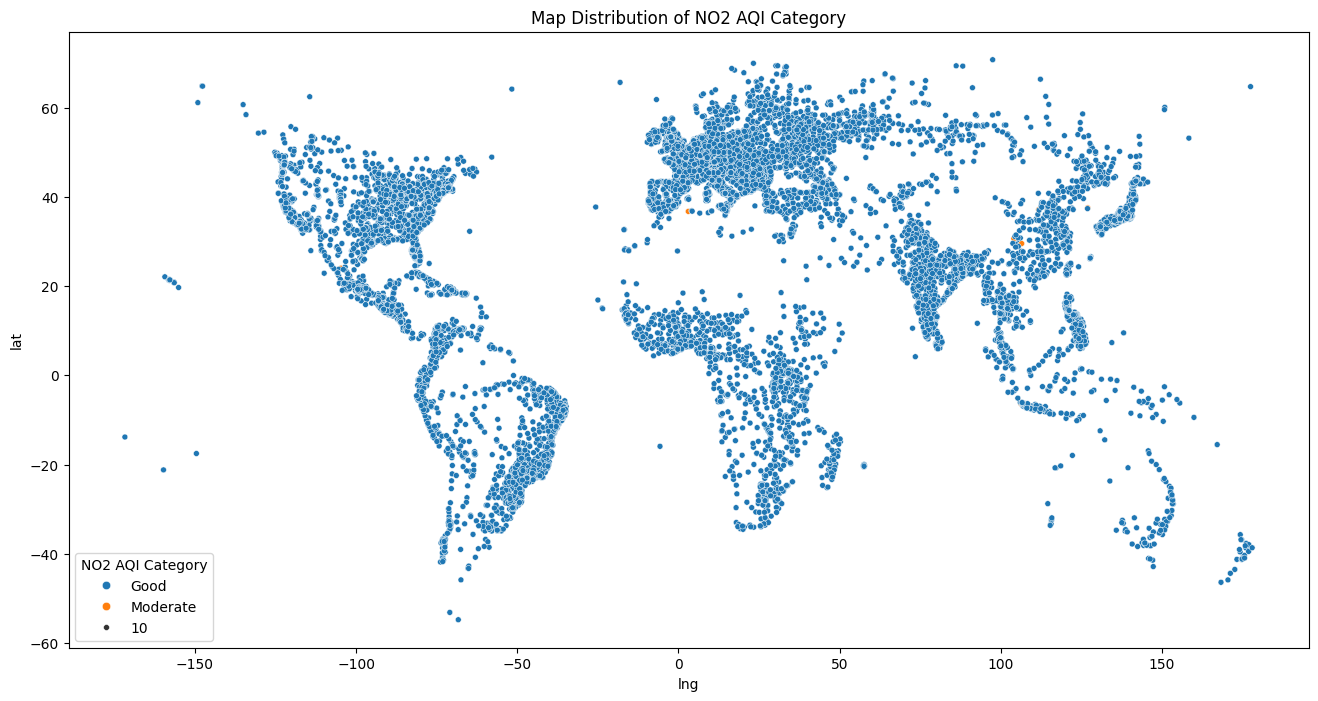

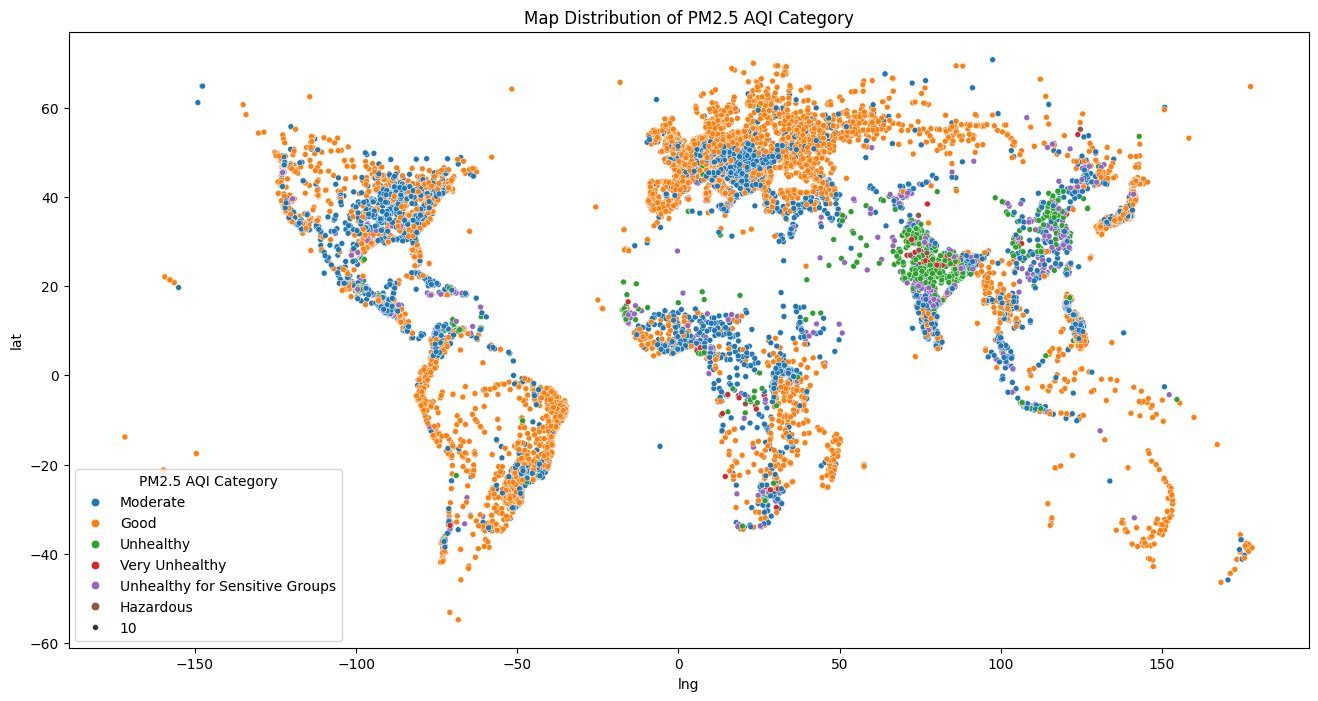

In [344]:
# Now let's plot the distrubution for the other features
for x in  ['CO AQI Category', 'Ozone AQI Category', 'NO2 AQI Category', 'PM2.5 AQI Category']:
    
    plt.figure(figsize=(16, 8))
    sns.scatterplot(data= df, x='lng', y='lat', hue=df[x], size=10)
    plt.title(f'Map Distribution of {x}')

In [345]:
# Now let's group the cities by countries and for each country
# get the mean of AQI scores and plot them in a histogram
grouped_countries = df.groupby("Country")

for country, content in list(grouped_countries):
    print(country, content)
    print("\n")

Afghanistan            Country      City  AQI Value                    AQI Category  \
10814  Afghanistan     Kabul         64                        Moderate   
12279  Afghanistan    Zaranj        133  Unhealthy for Sensitive Groups   
12804  Afghanistan  Taywarah         62                        Moderate   

       CO AQI Value CO AQI Category  Ozone AQI Value Ozone AQI Category  \
10814             0            Good               41               Good   
12279             1            Good               46               Good   
12804             0            Good               39               Good   

       NO2 AQI Value NO2 AQI Category  PM2.5 AQI Value  \
10814              0             Good               64   
12279              0             Good              133   
12804              0             Good               62   

                   PM2.5 AQI Category      lat      lng  
10814                        Moderate  34.5253  69.1783  
12279  Unhealthy for Sensitive Groups

In [346]:
values_count = df['Country'].value_counts().sort_values(ascending=False)
values_count

Country
United States of America    2777
Germany                     1040
Russian Federation           853
Italy                        845
Brazil                       784
                            ... 
Luxembourg                     1
Aruba                          1
Saint Kitts and Nevis          1
Qatar                          1
Monaco                         1
Name: count, Length: 174, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


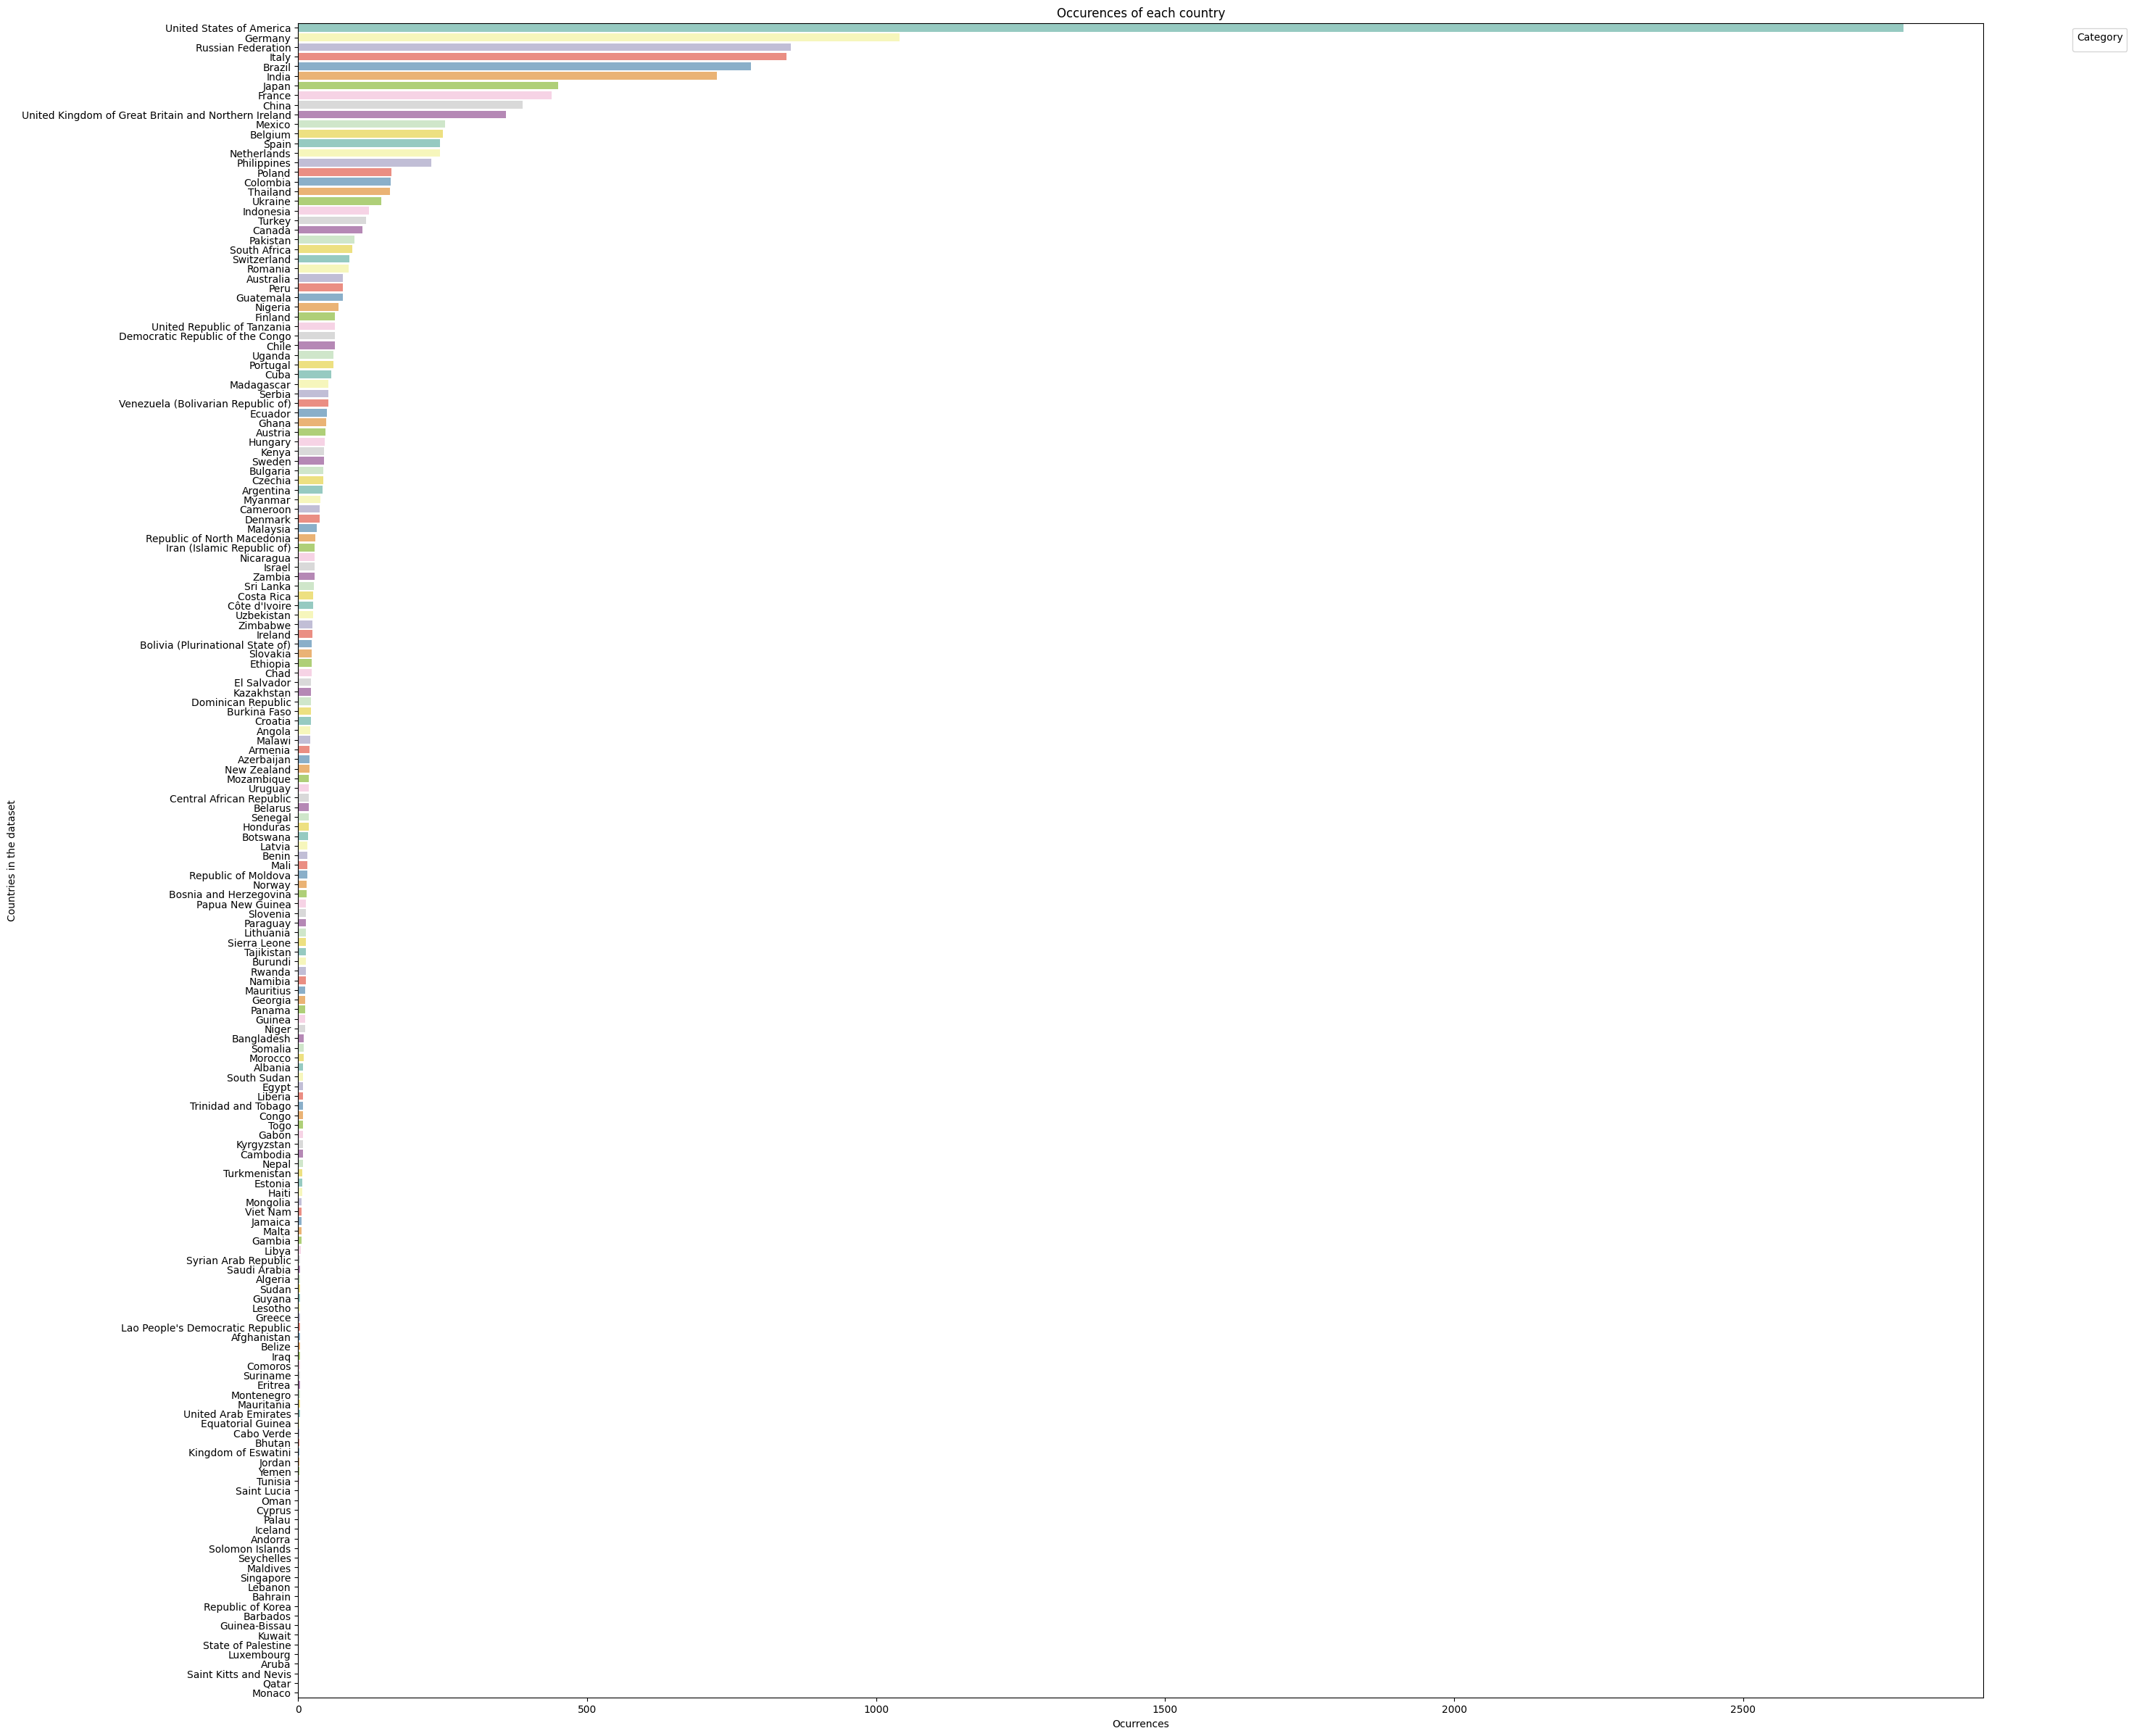

In [347]:
plt.figure(figsize=(30,30))
plt.title('Occurences of each country')
values_count_df = pd.DataFrame({'Country': values_count.index, 'count': values_count.values})
sns.barplot(values_count_df, y='Country', x='count', palette='Set3', hue='Country')
plt.xlabel ('Ocurrences')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)
plt.ylabel('Countries in the dataset')
plt.show()

We can prune the countries to the top 20 countries for better visualization

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


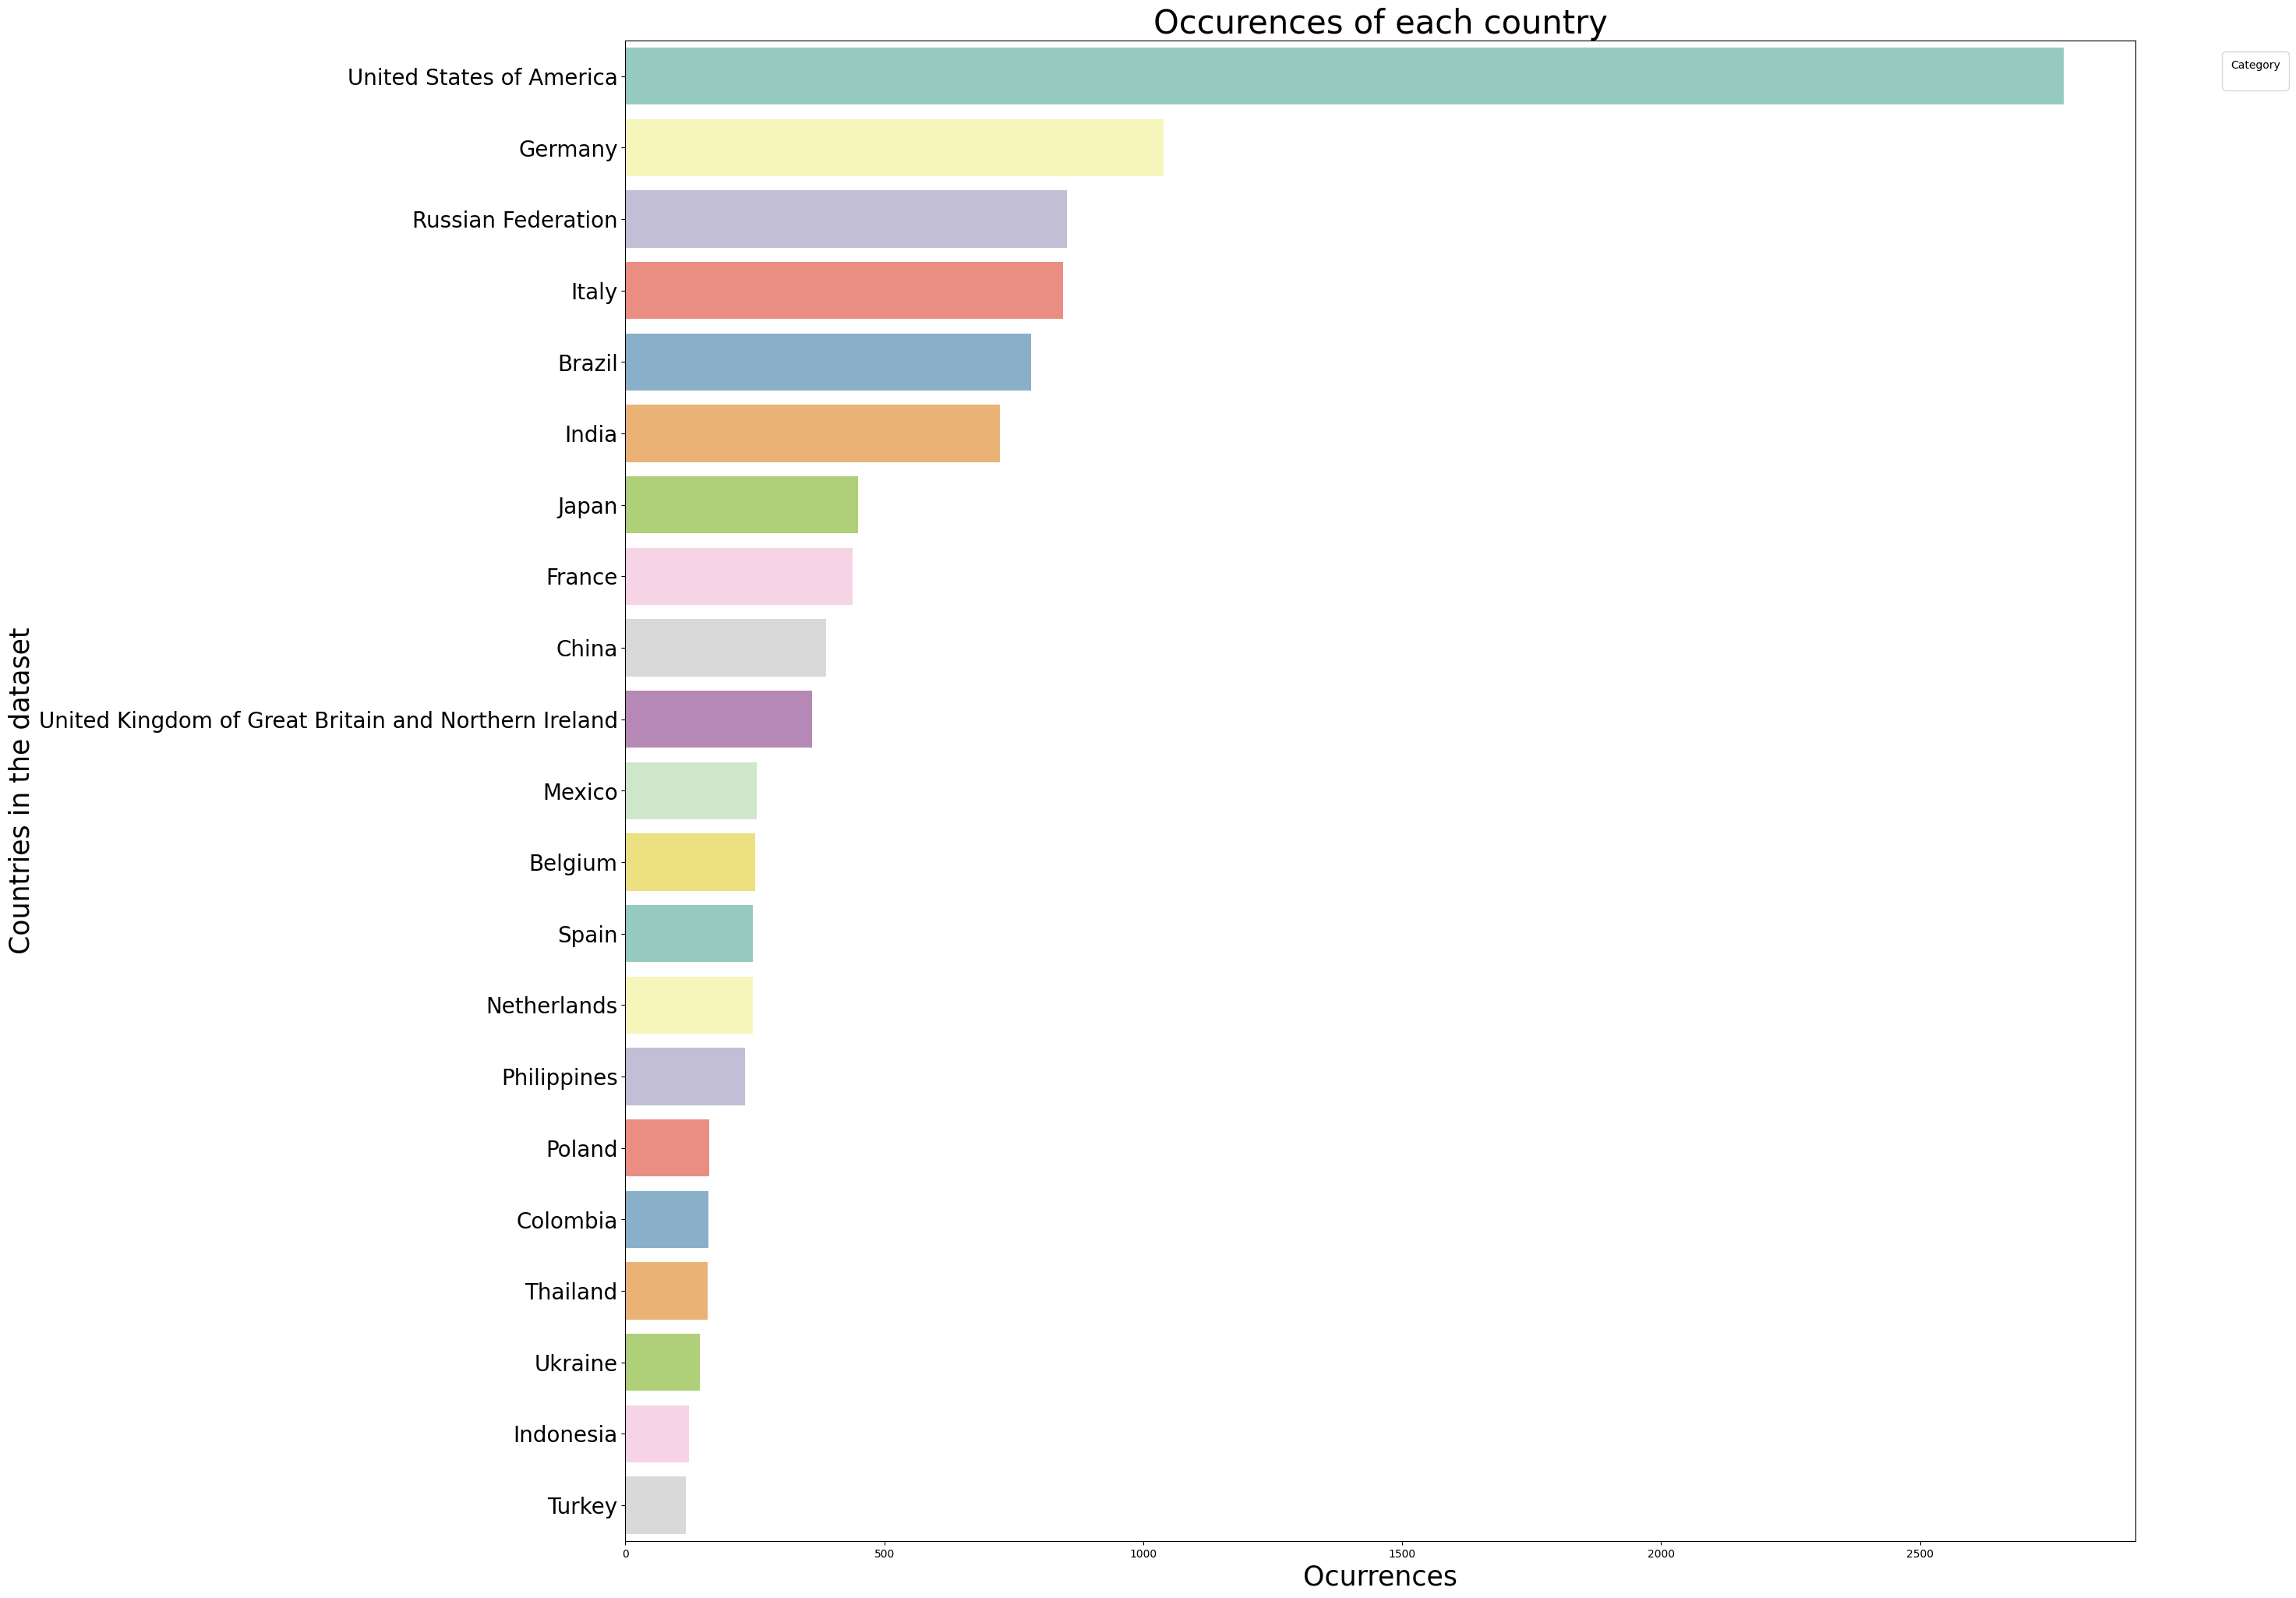

In [348]:
plt.figure(figsize=(25,25))
plt.title('Occurences of each country', fontsize=30)
sns.barplot(values_count_df[:21], y='Country', x='count', palette='Set3', hue='Country')
plt.xlabel ('Ocurrences', fontsize=25)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left', prop={'size': 20})
plt.ylabel('Countries in the dataset', fontsize=25)
plt.yticks(fontsize=20)
plt.show()

We notice that the countries with the biggest number of occurences in our dataset are : **The united states of America**, then **Germany**, **The Russian federation**, **Italy** then **Brazil**

In [349]:
averaged_countries = df.groupby('Country')['AQI Value'].mean().sort_values(ascending=False)
averaged_countries

Country
Republic of Korea                   421.000000
Bahrain                             188.000000
Pakistan                            184.336735
Saudi Arabia                        166.250000
Mauritania                          164.000000
                                       ...    
Bolivia (Plurinational State of)     24.875000
Iceland                              23.000000
Maldives                             19.000000
Solomon Islands                      18.000000
Palau                                16.000000
Name: AQI Value, Length: 174, dtype: float64

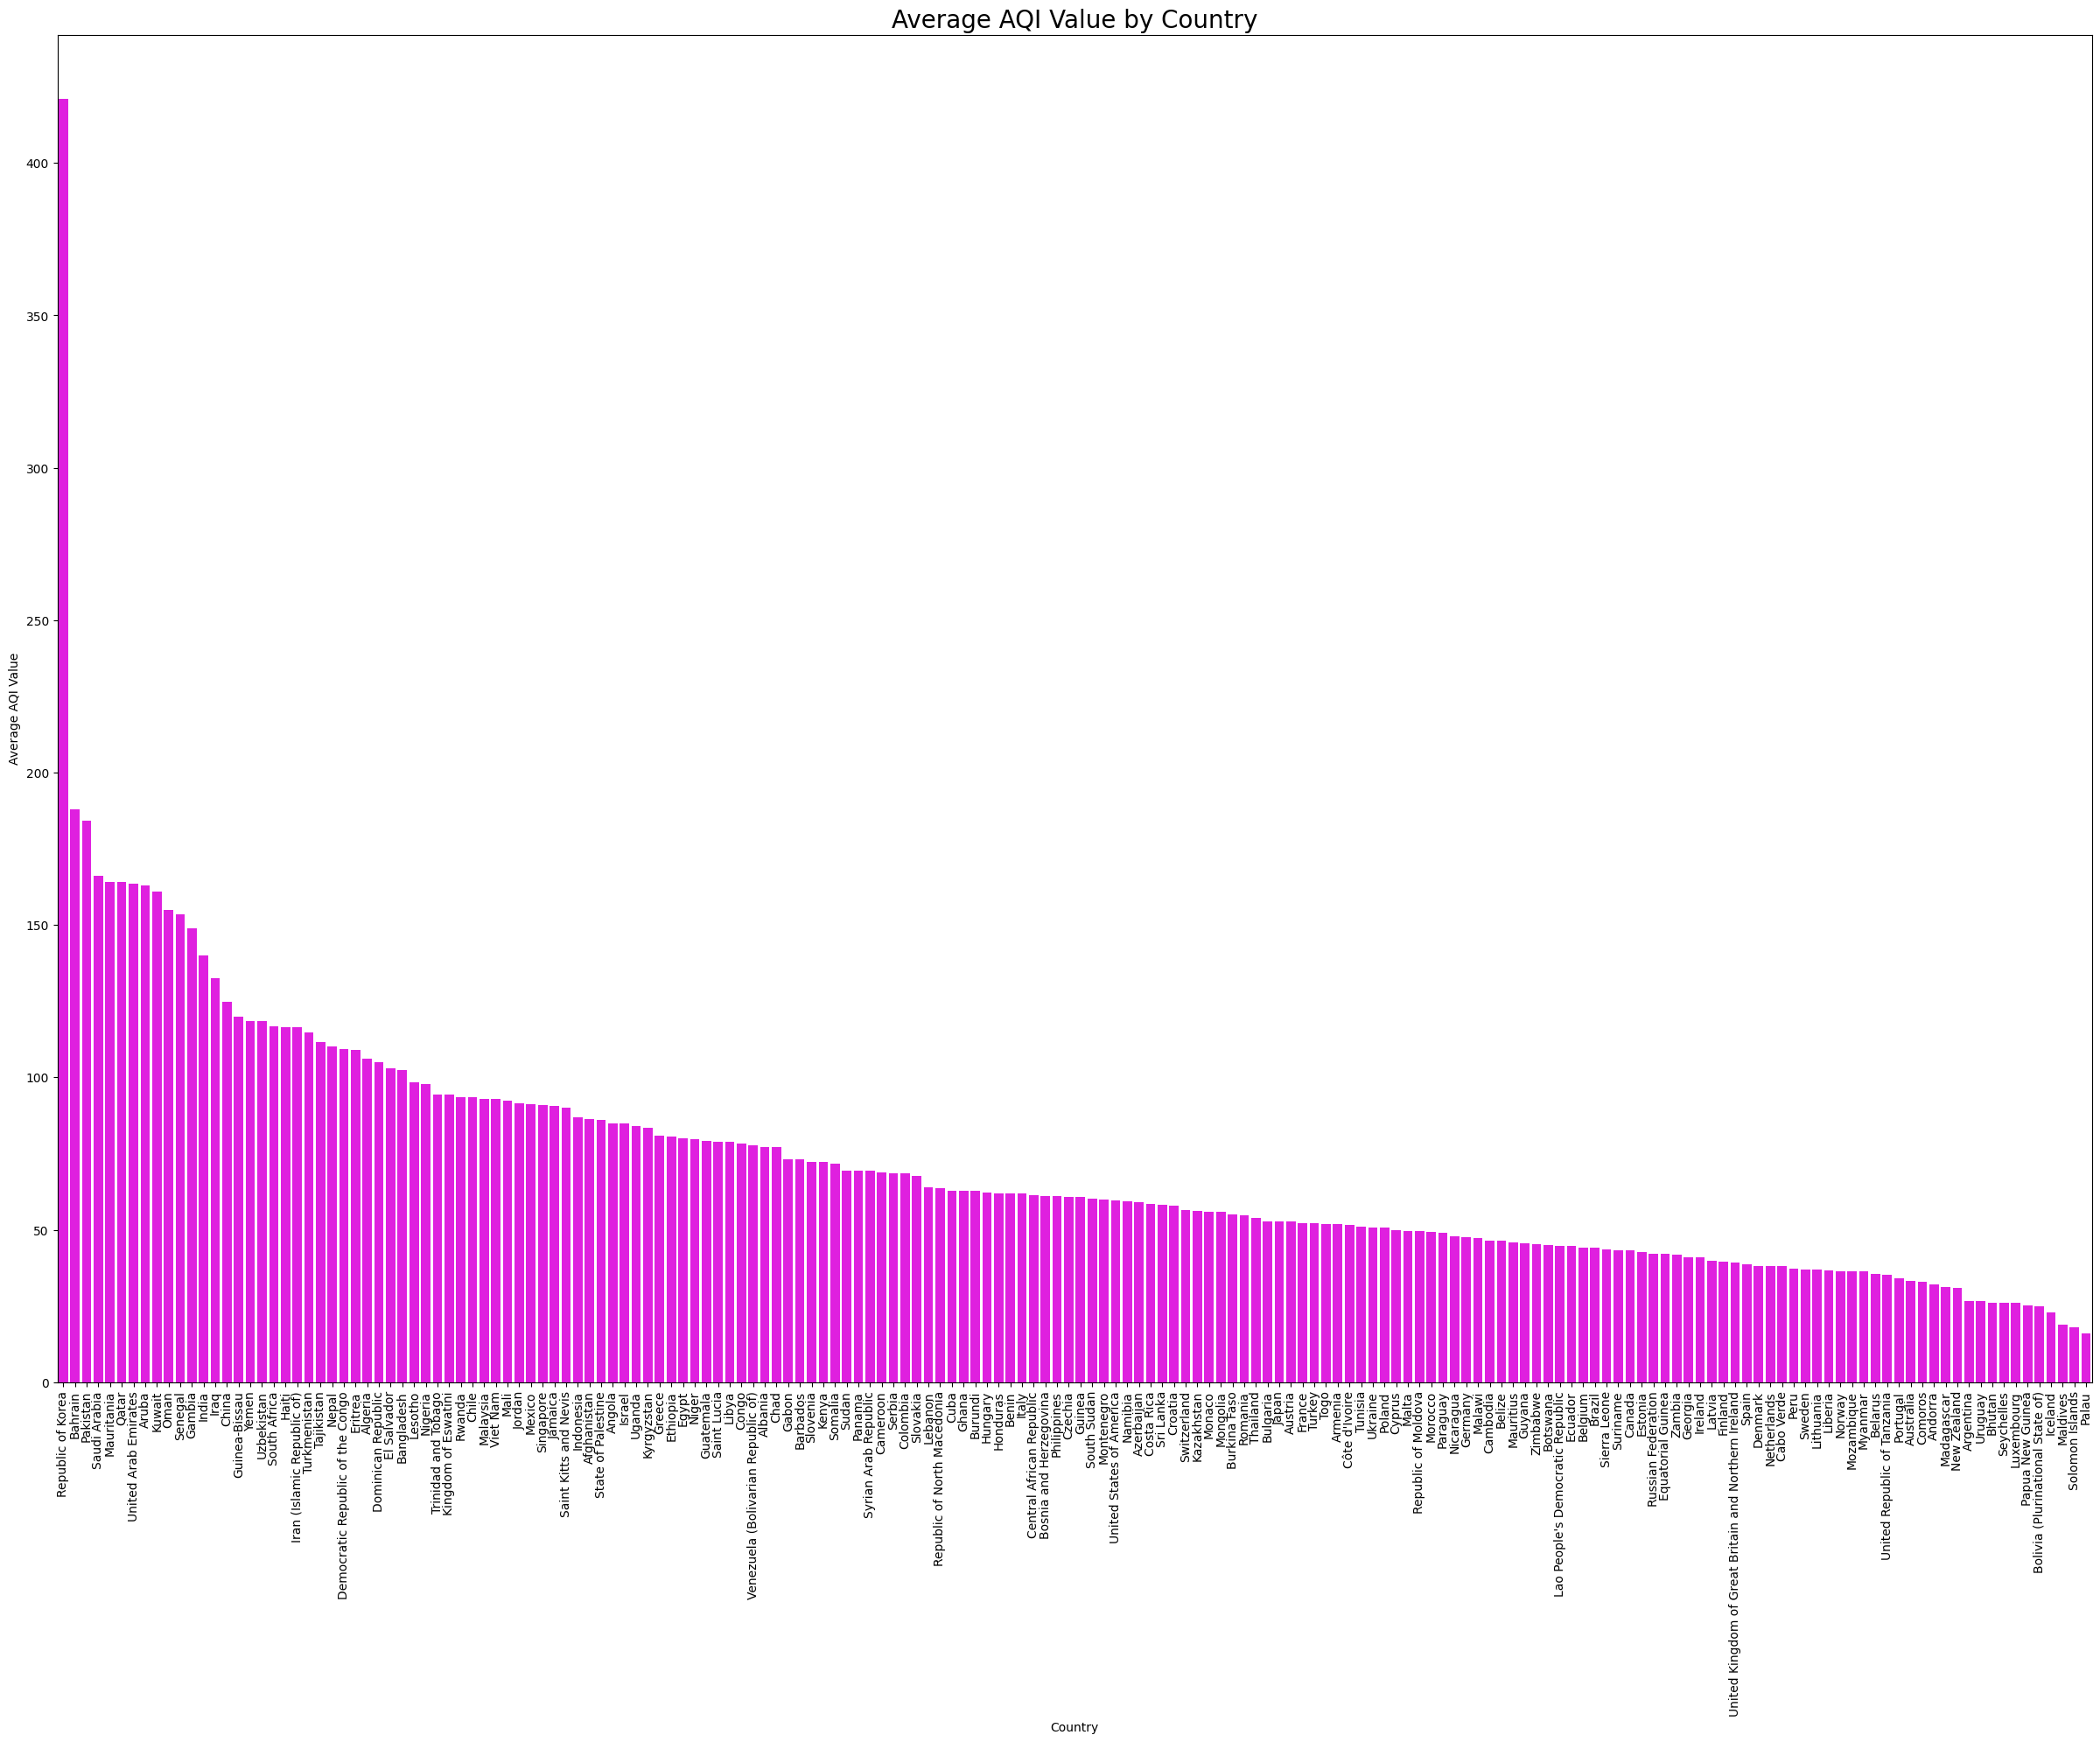

In [350]:
# Plotting the average AQI value for each country

plt.figure(figsize=(30, 20))
sns.barplot(x= averaged_countries.index,y=averaged_countries.values, color="magenta")
plt.title("Average AQI Value by Country", fontsize=20)
plt.xlabel("Country")
plt.ylabel("Average AQI Value")
plt.xticks(rotation=90)  # we rotate x-axis labels for better readability
plt.show()

We notice that the **Republic of Korea** has the biggest avergae value of the AQI reaching 421
But this is not highly significant because if we check Korea, we only have one occurence of it in just on city **Seoul** which happens to have the AQI value of 421

In [351]:
k = averaged_countries['Republic of Korea']
print(f'THE AVERAGE AQI SCORE IN KOREA : {k}')

THE AVERAGE AQI SCORE IN KOREA : 421.0


In [352]:
aqi_categories = df['AQI Category'].value_counts()
aqi_categories

AQI Category
Good                              6670
Moderate                          5872
Unhealthy                          773
Unhealthy for Sensitive Groups     745
Very Unhealthy                     120
Hazardous                           49
Name: count, dtype: int64

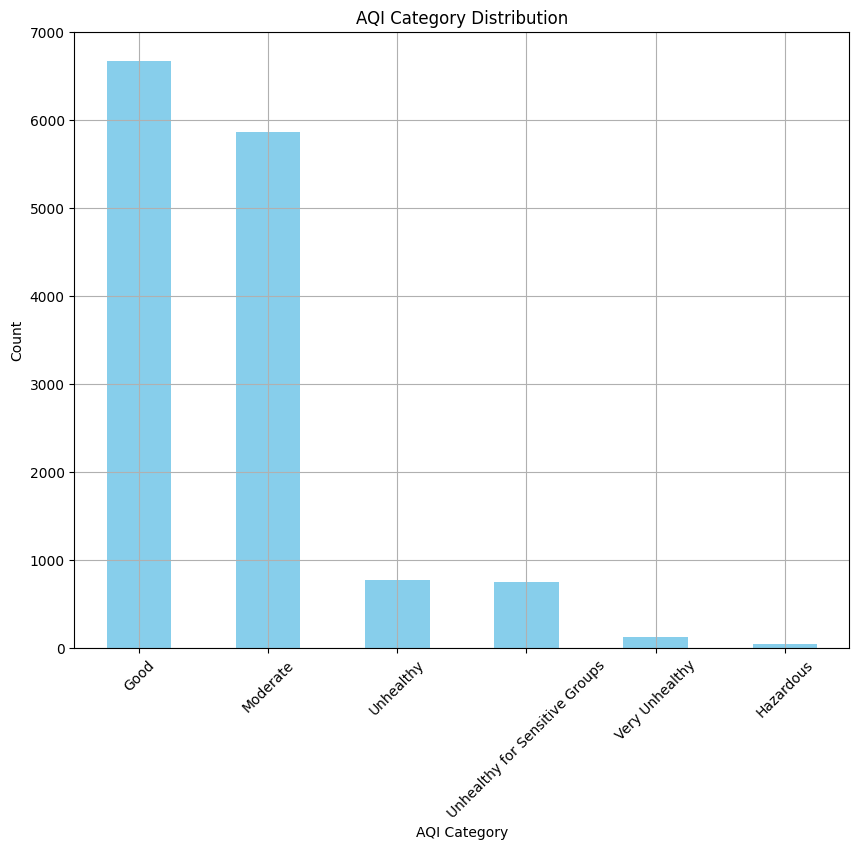

In [353]:
import pandas as pd
import matplotlib.pyplot as plt

# Plotting the AQI Category feature

category_counts = df['AQI Category'].value_counts()
plt.figure(figsize=(10 ,8))
category_counts.plot(kind='bar', color='skyblue', grid=True)
plt.title('AQI Category Distribution')
plt.xlabel('AQI Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

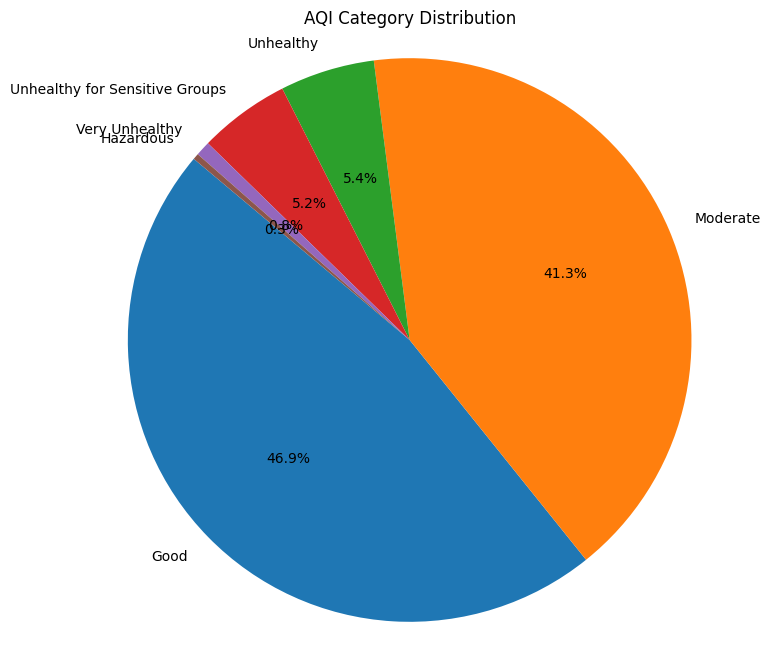

In [354]:
plt.figure(figsize=(6, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('AQI Category Distribution')
plt.axis('equal')  
plt.show()

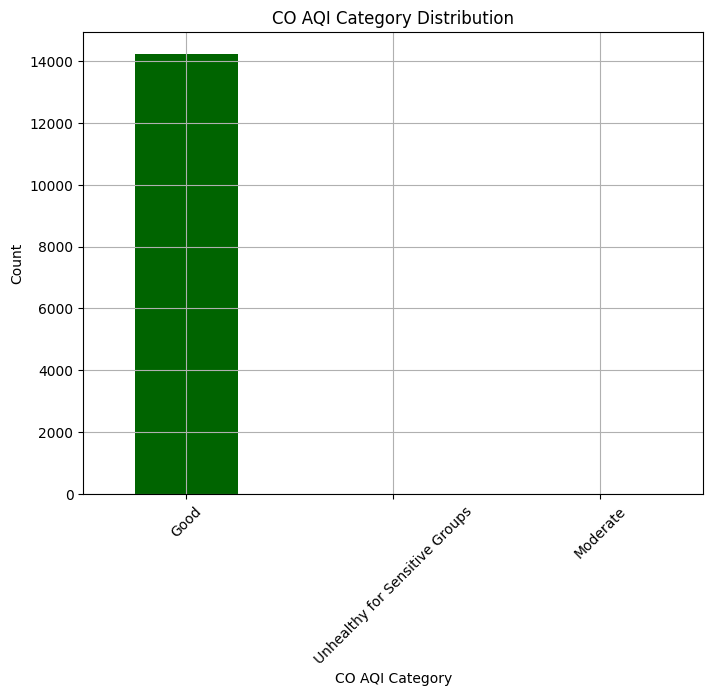

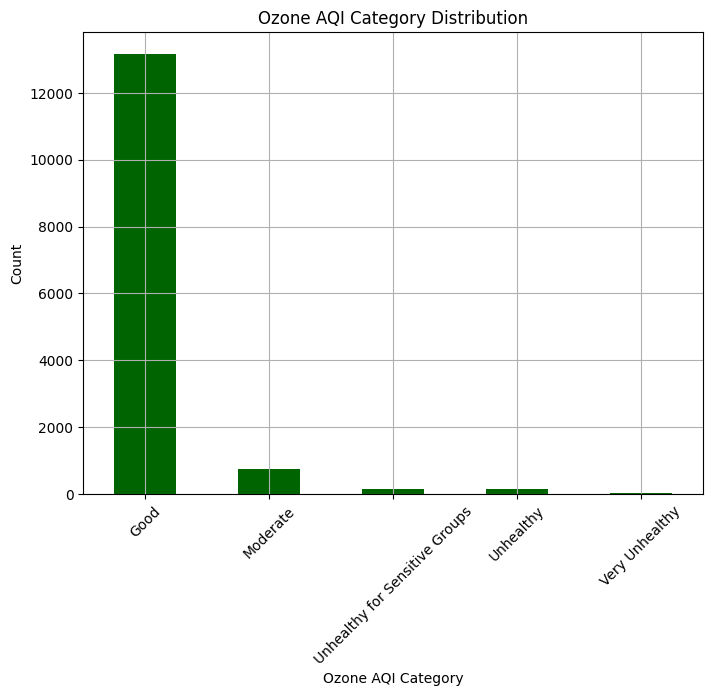

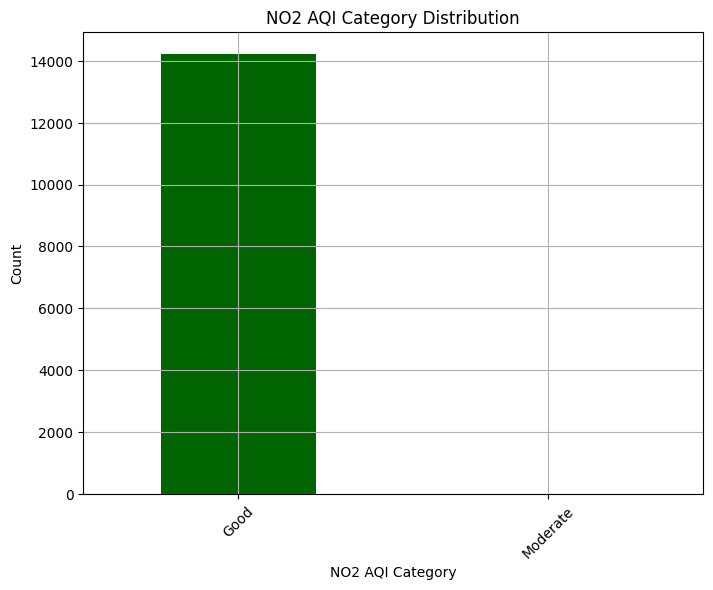

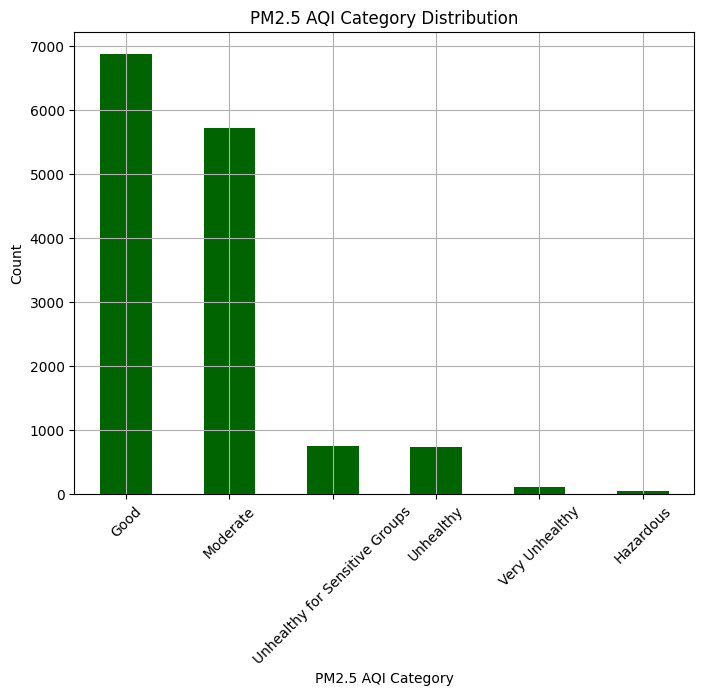

In [355]:
category_columns = ['CO AQI Category','Ozone AQI Category','NO2 AQI Category' , 'PM2.5 AQI Category']
for col in category_columns : 
    data = df[col].value_counts()
    plt.figure(figsize=(8,6))
    data.plot(kind='bar', color='darkgreen', grid=True)
    plt.title(f'{col} Distribution')
    plt.xlabel(f'{col}')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

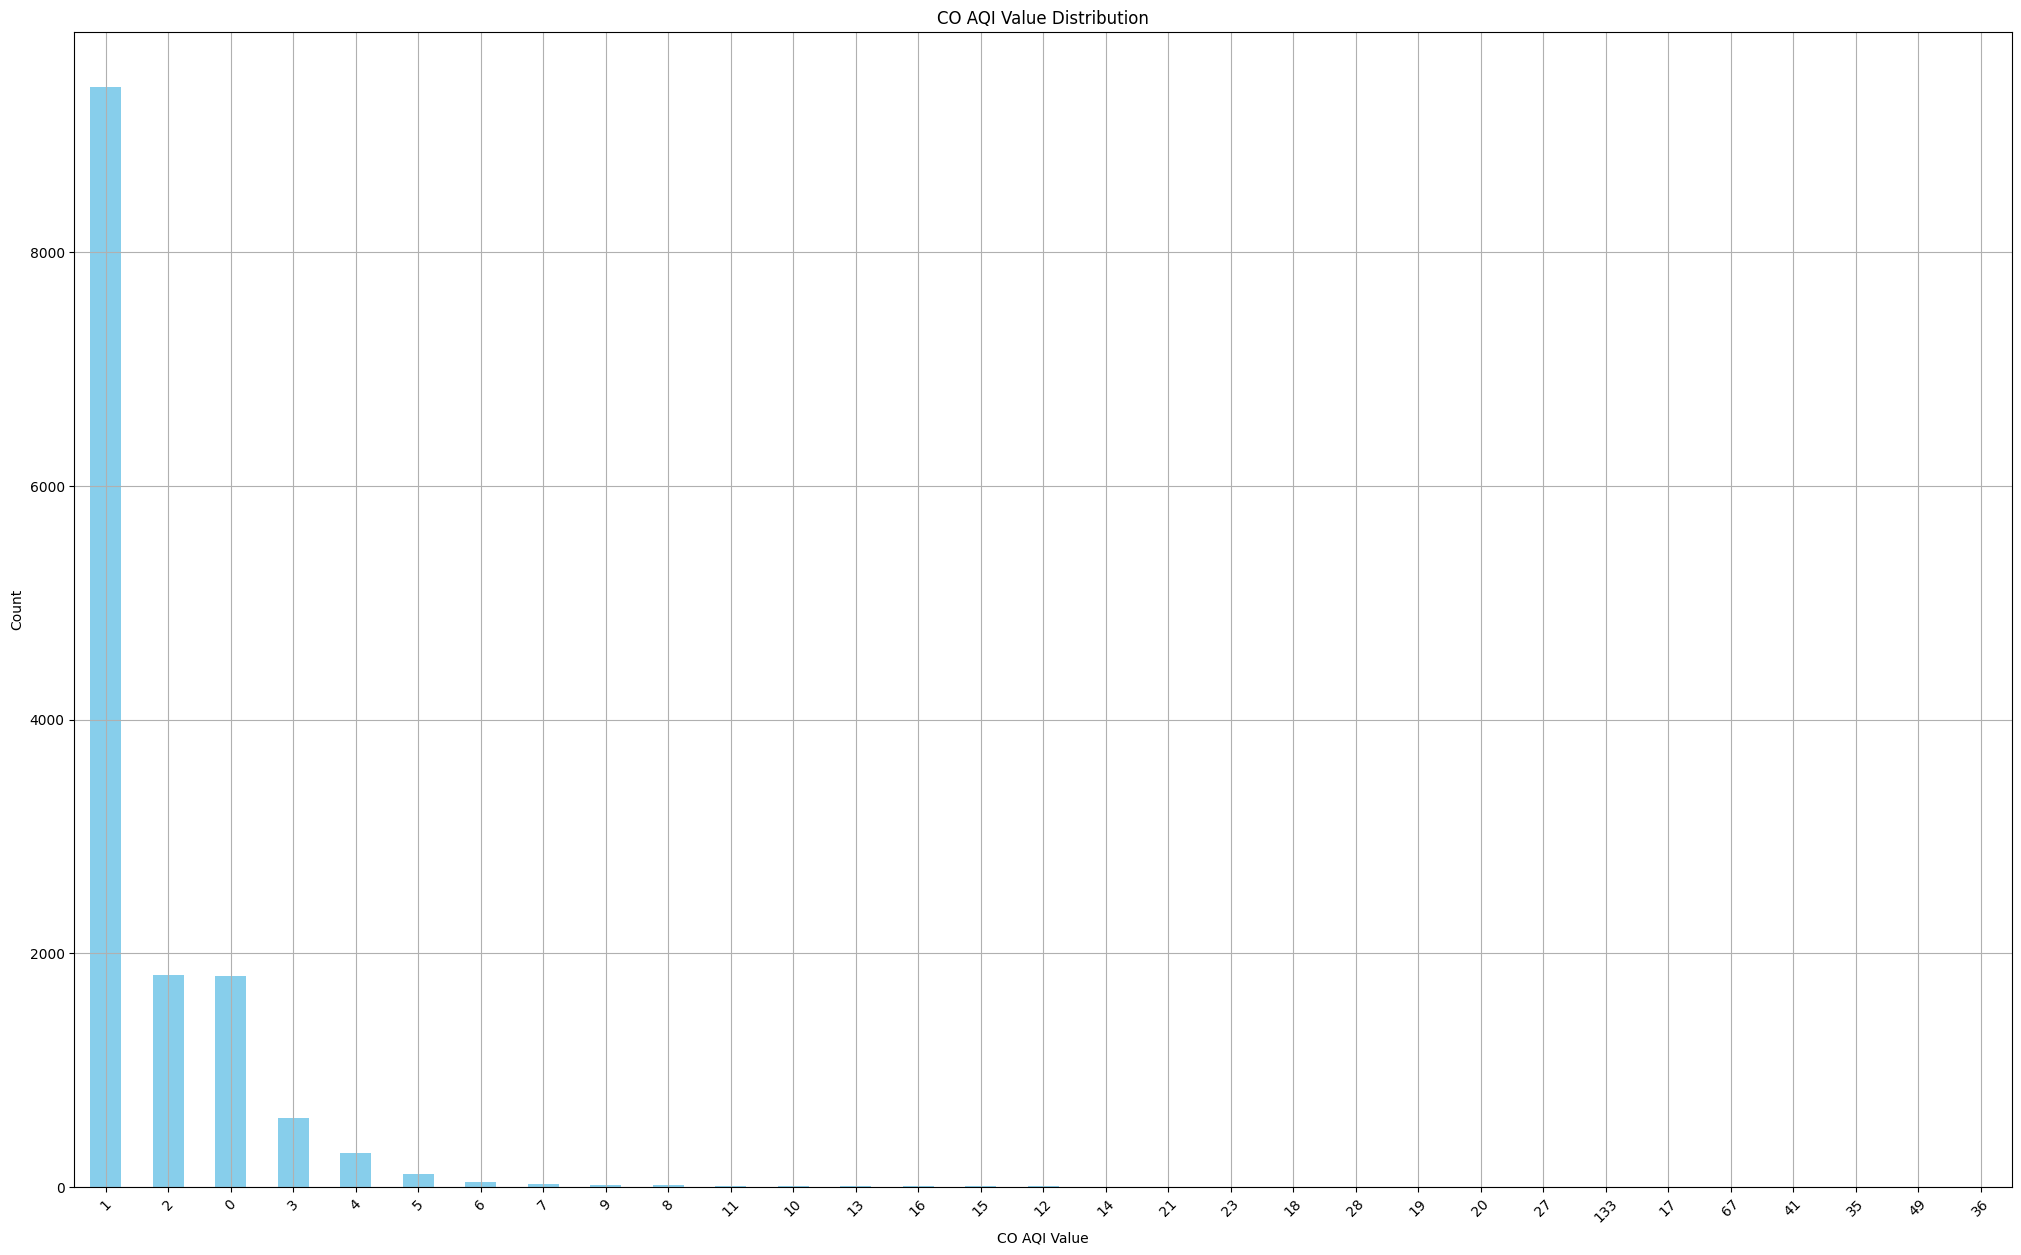

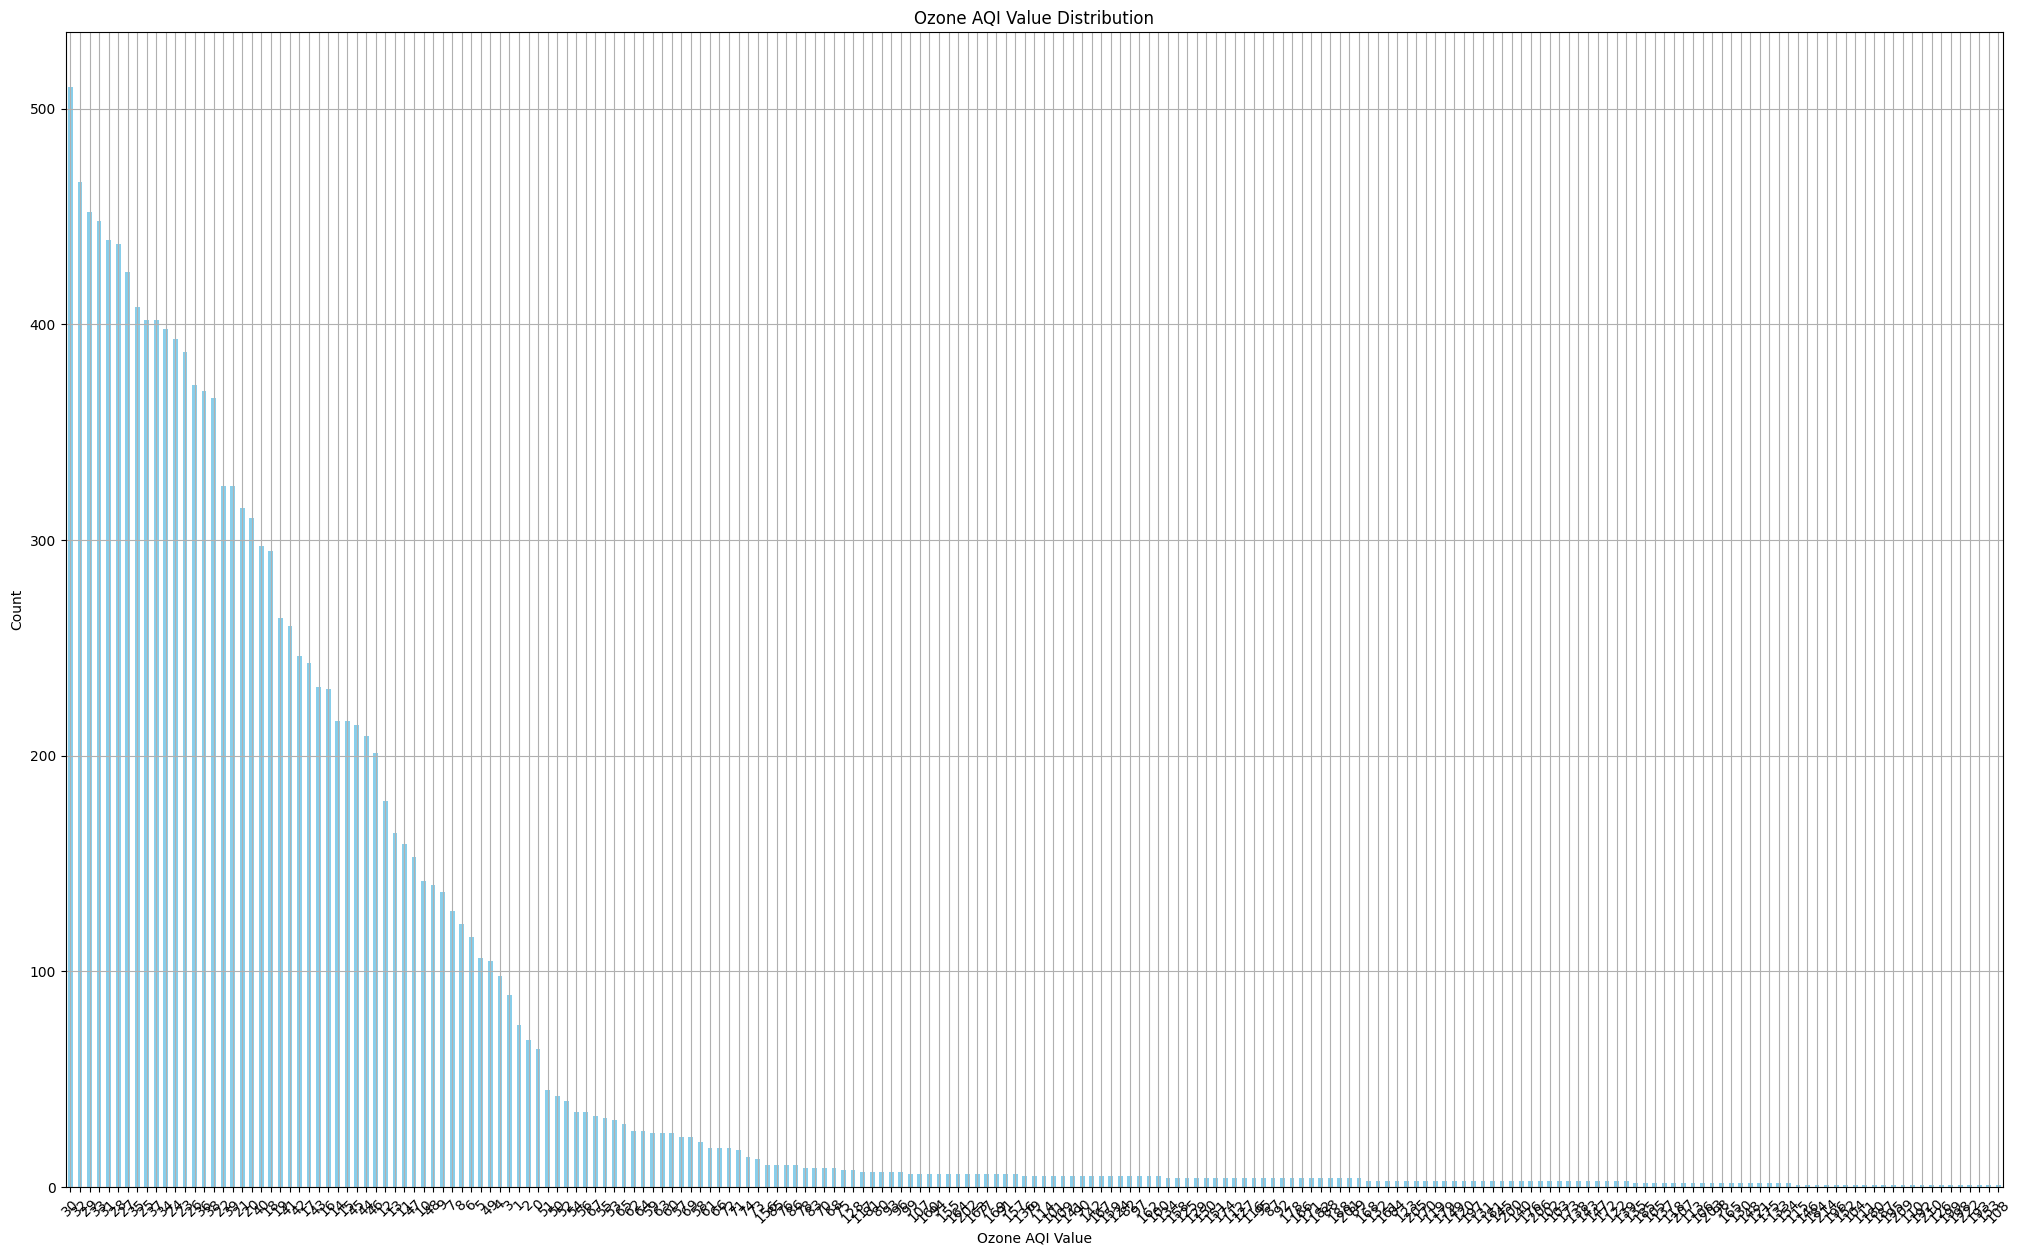

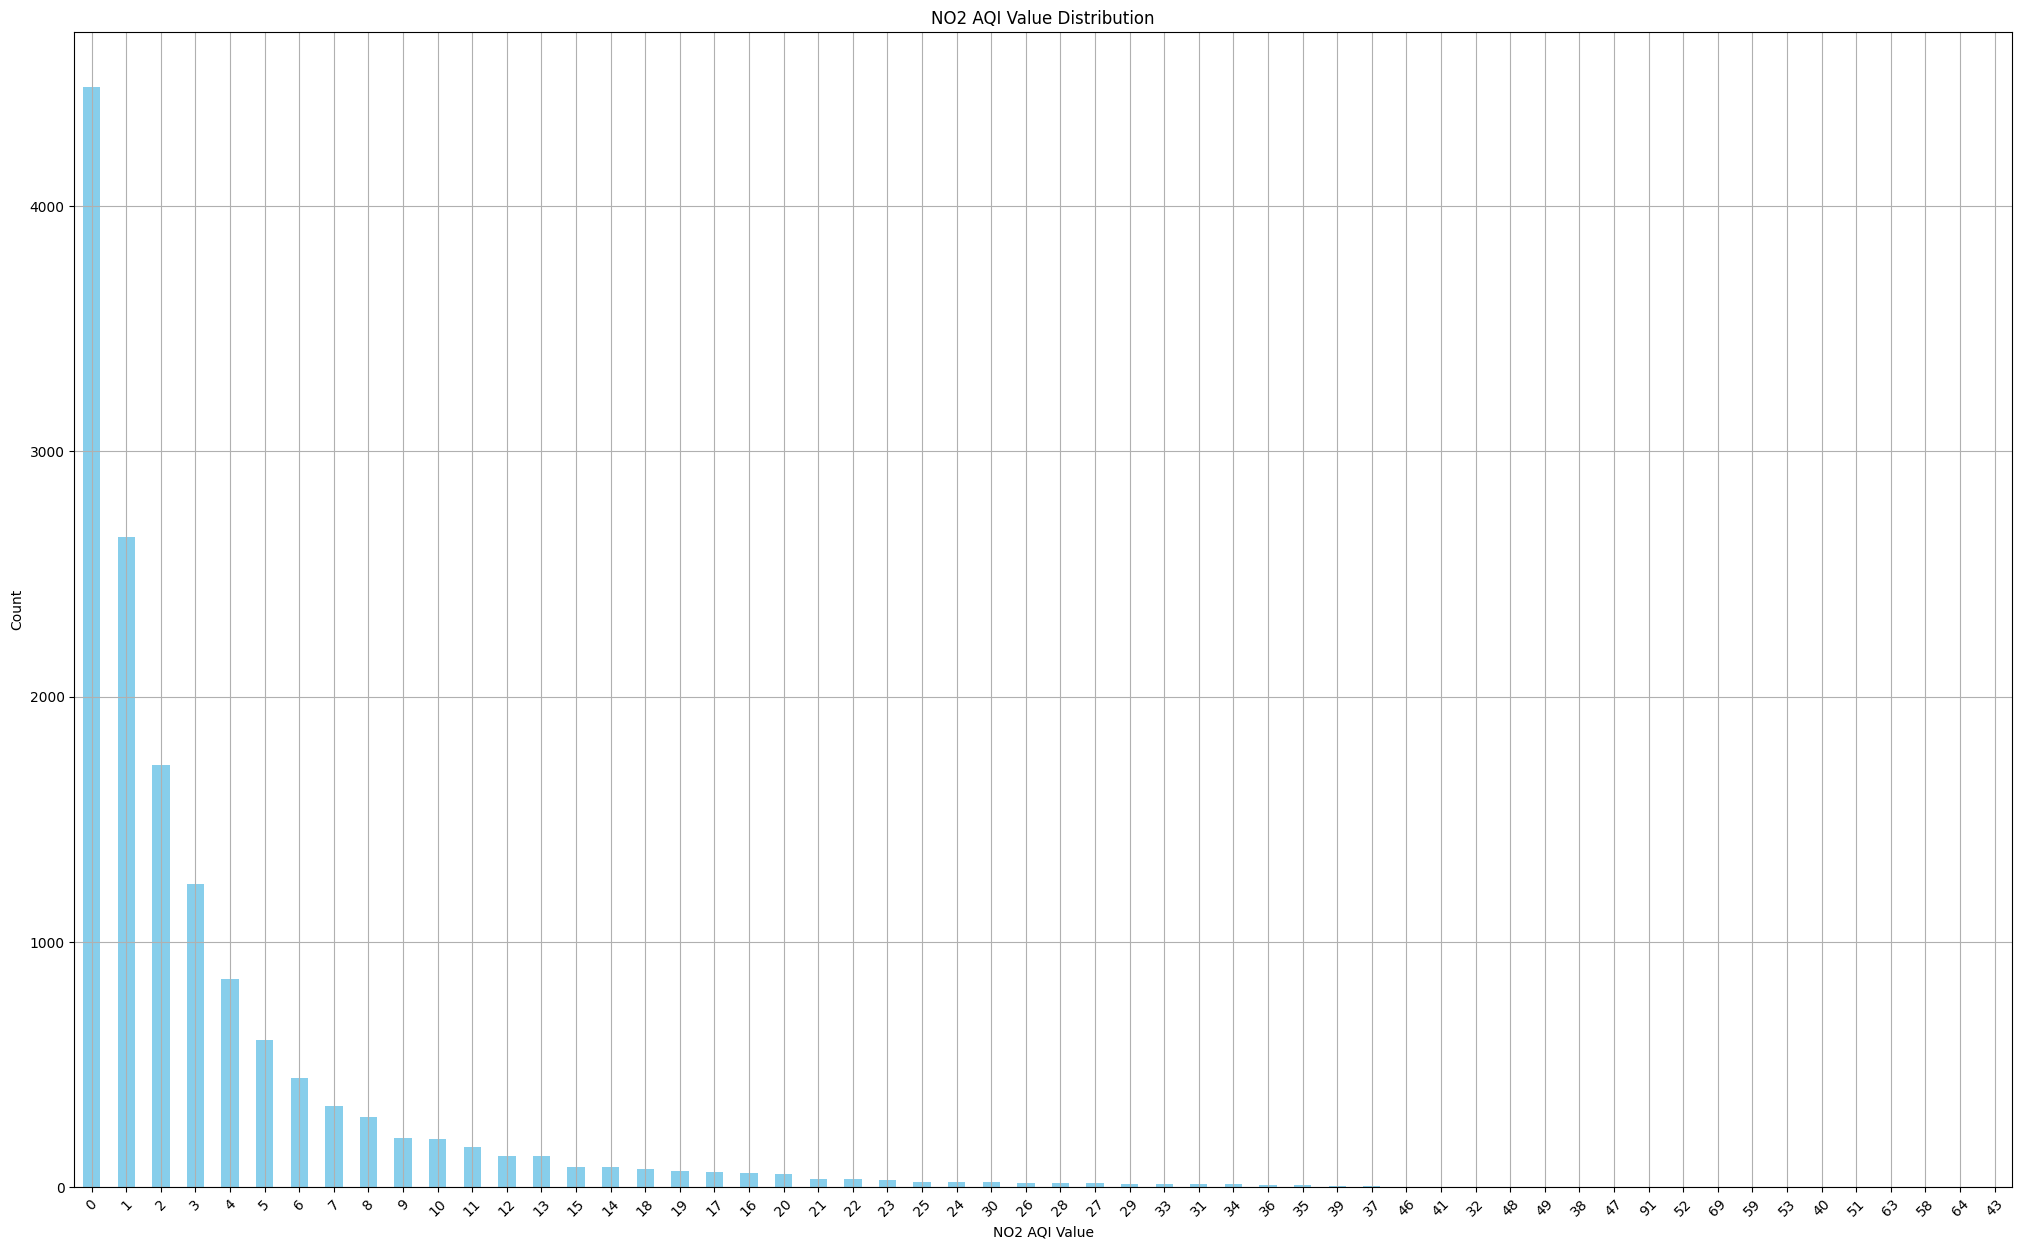

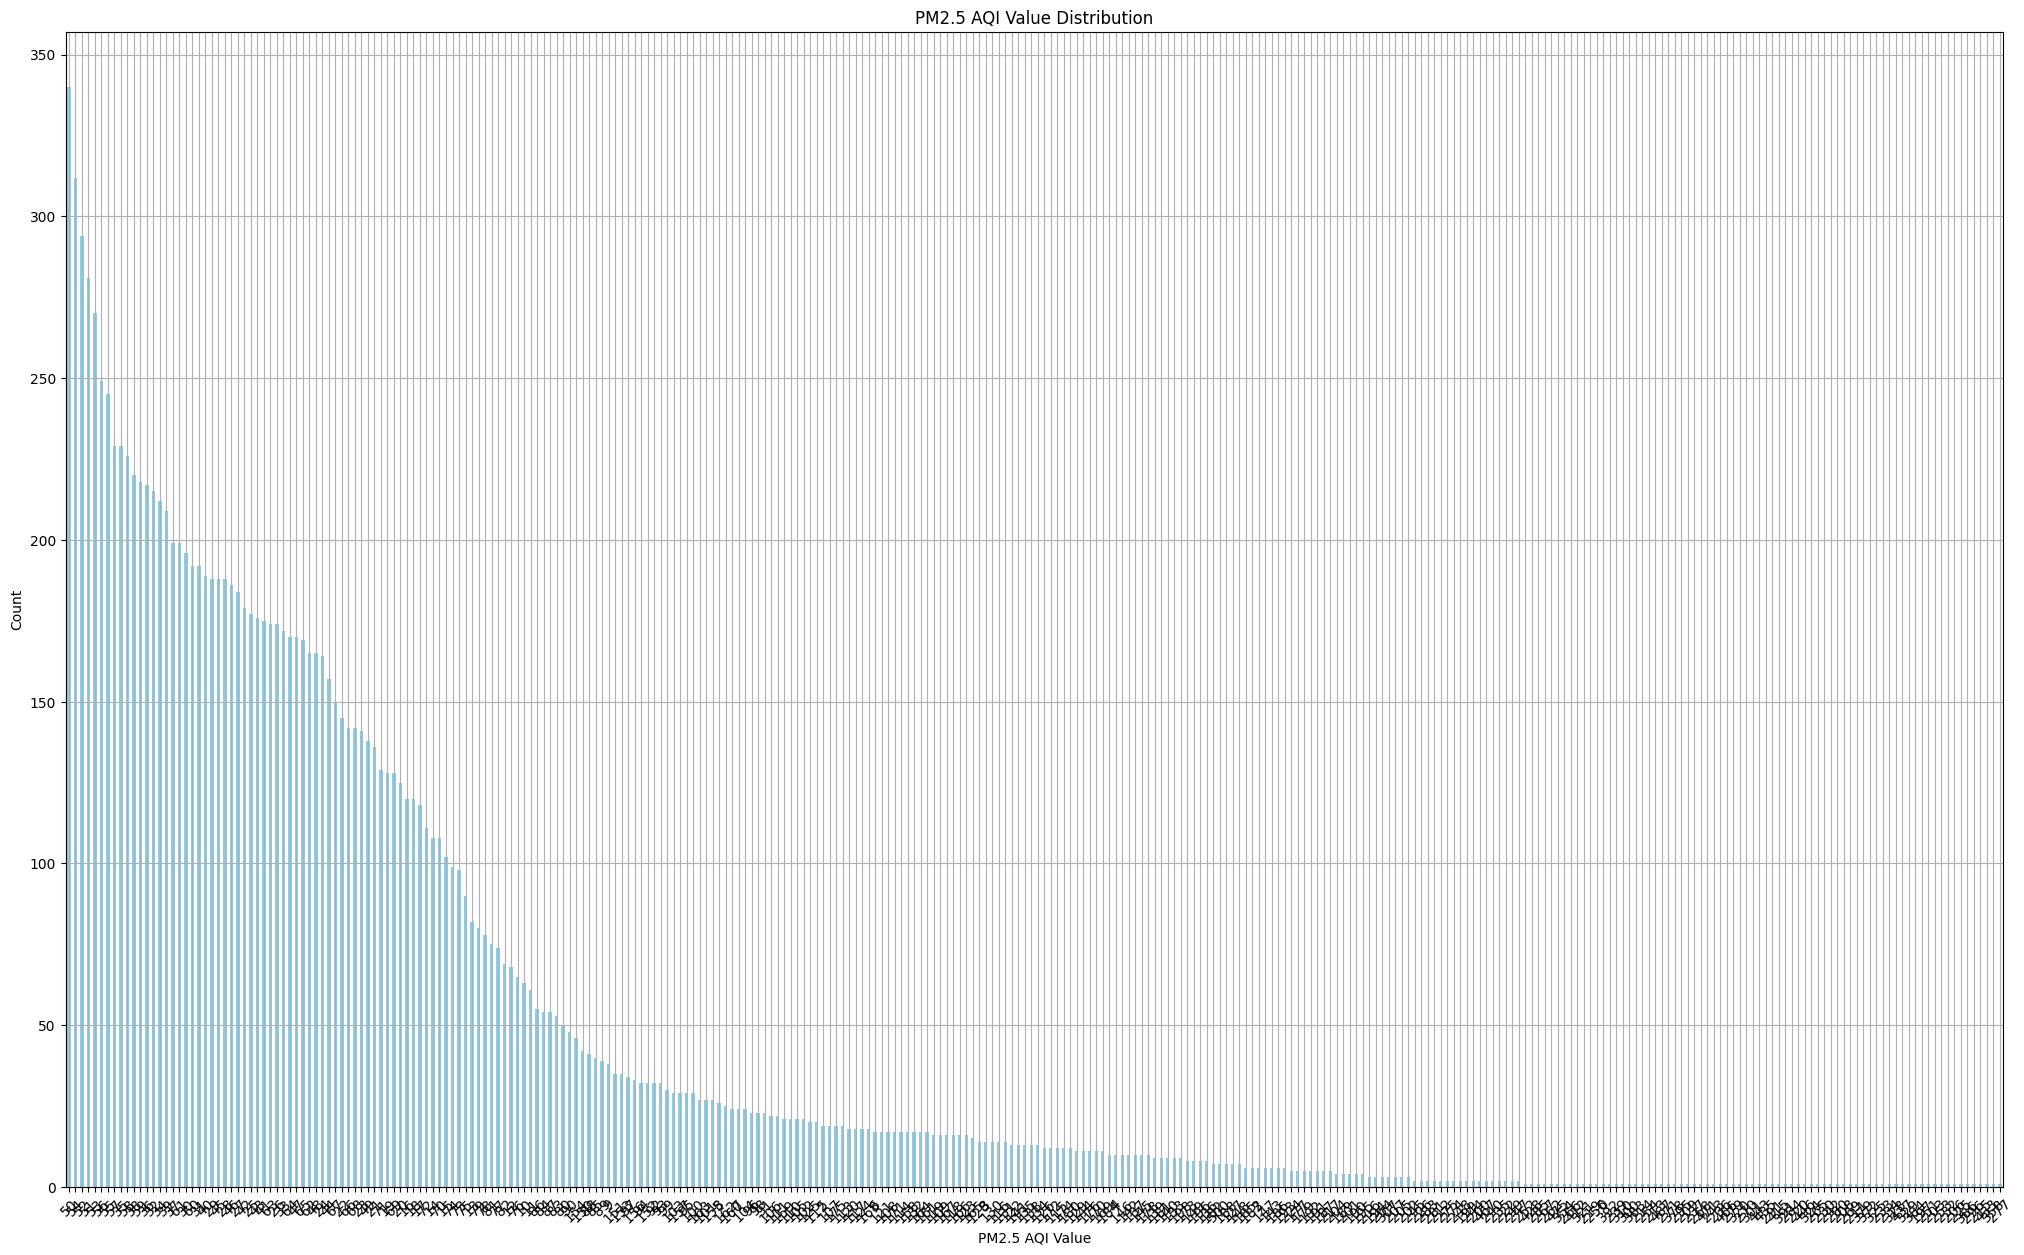

In [356]:
columns = ['CO AQI Value', 'Ozone AQI Value', 
       'NO2 AQI Value', 'PM2.5 AQI Value']
for col in columns : 
    data = df[col].value_counts()
    plt.figure(figsize=(25,15))
    data.plot(kind='bar', color='skyblue', grid=True)
    plt.title(f'{col} Distribution')
    plt.xlabel(f'{col}')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

In [357]:
%pip install pyarrow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


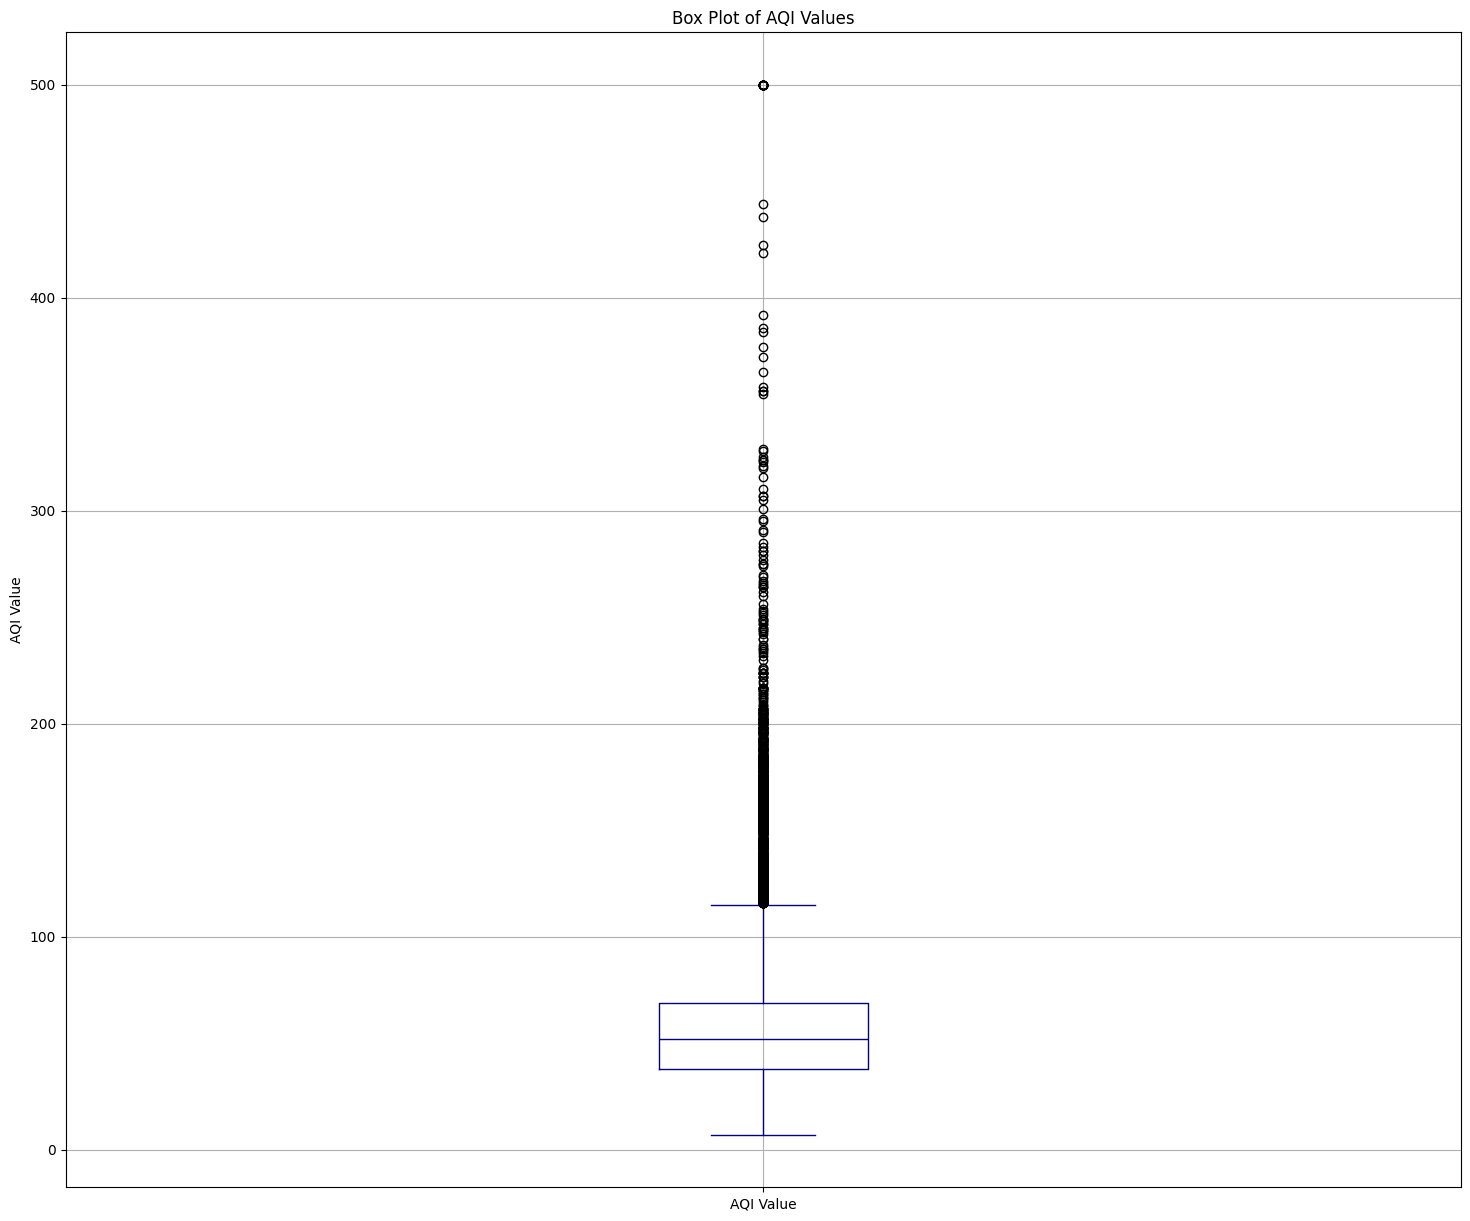

In [358]:
# Box plot of AQI values
plt.figure(figsize=(18, 15))
df.boxplot(column='AQI Value', grid=True, color='navy')
plt.title("Box Plot of AQI Values")
plt.ylabel("AQI Value")
plt.show()

<Figure size 2500x1800 with 0 Axes>

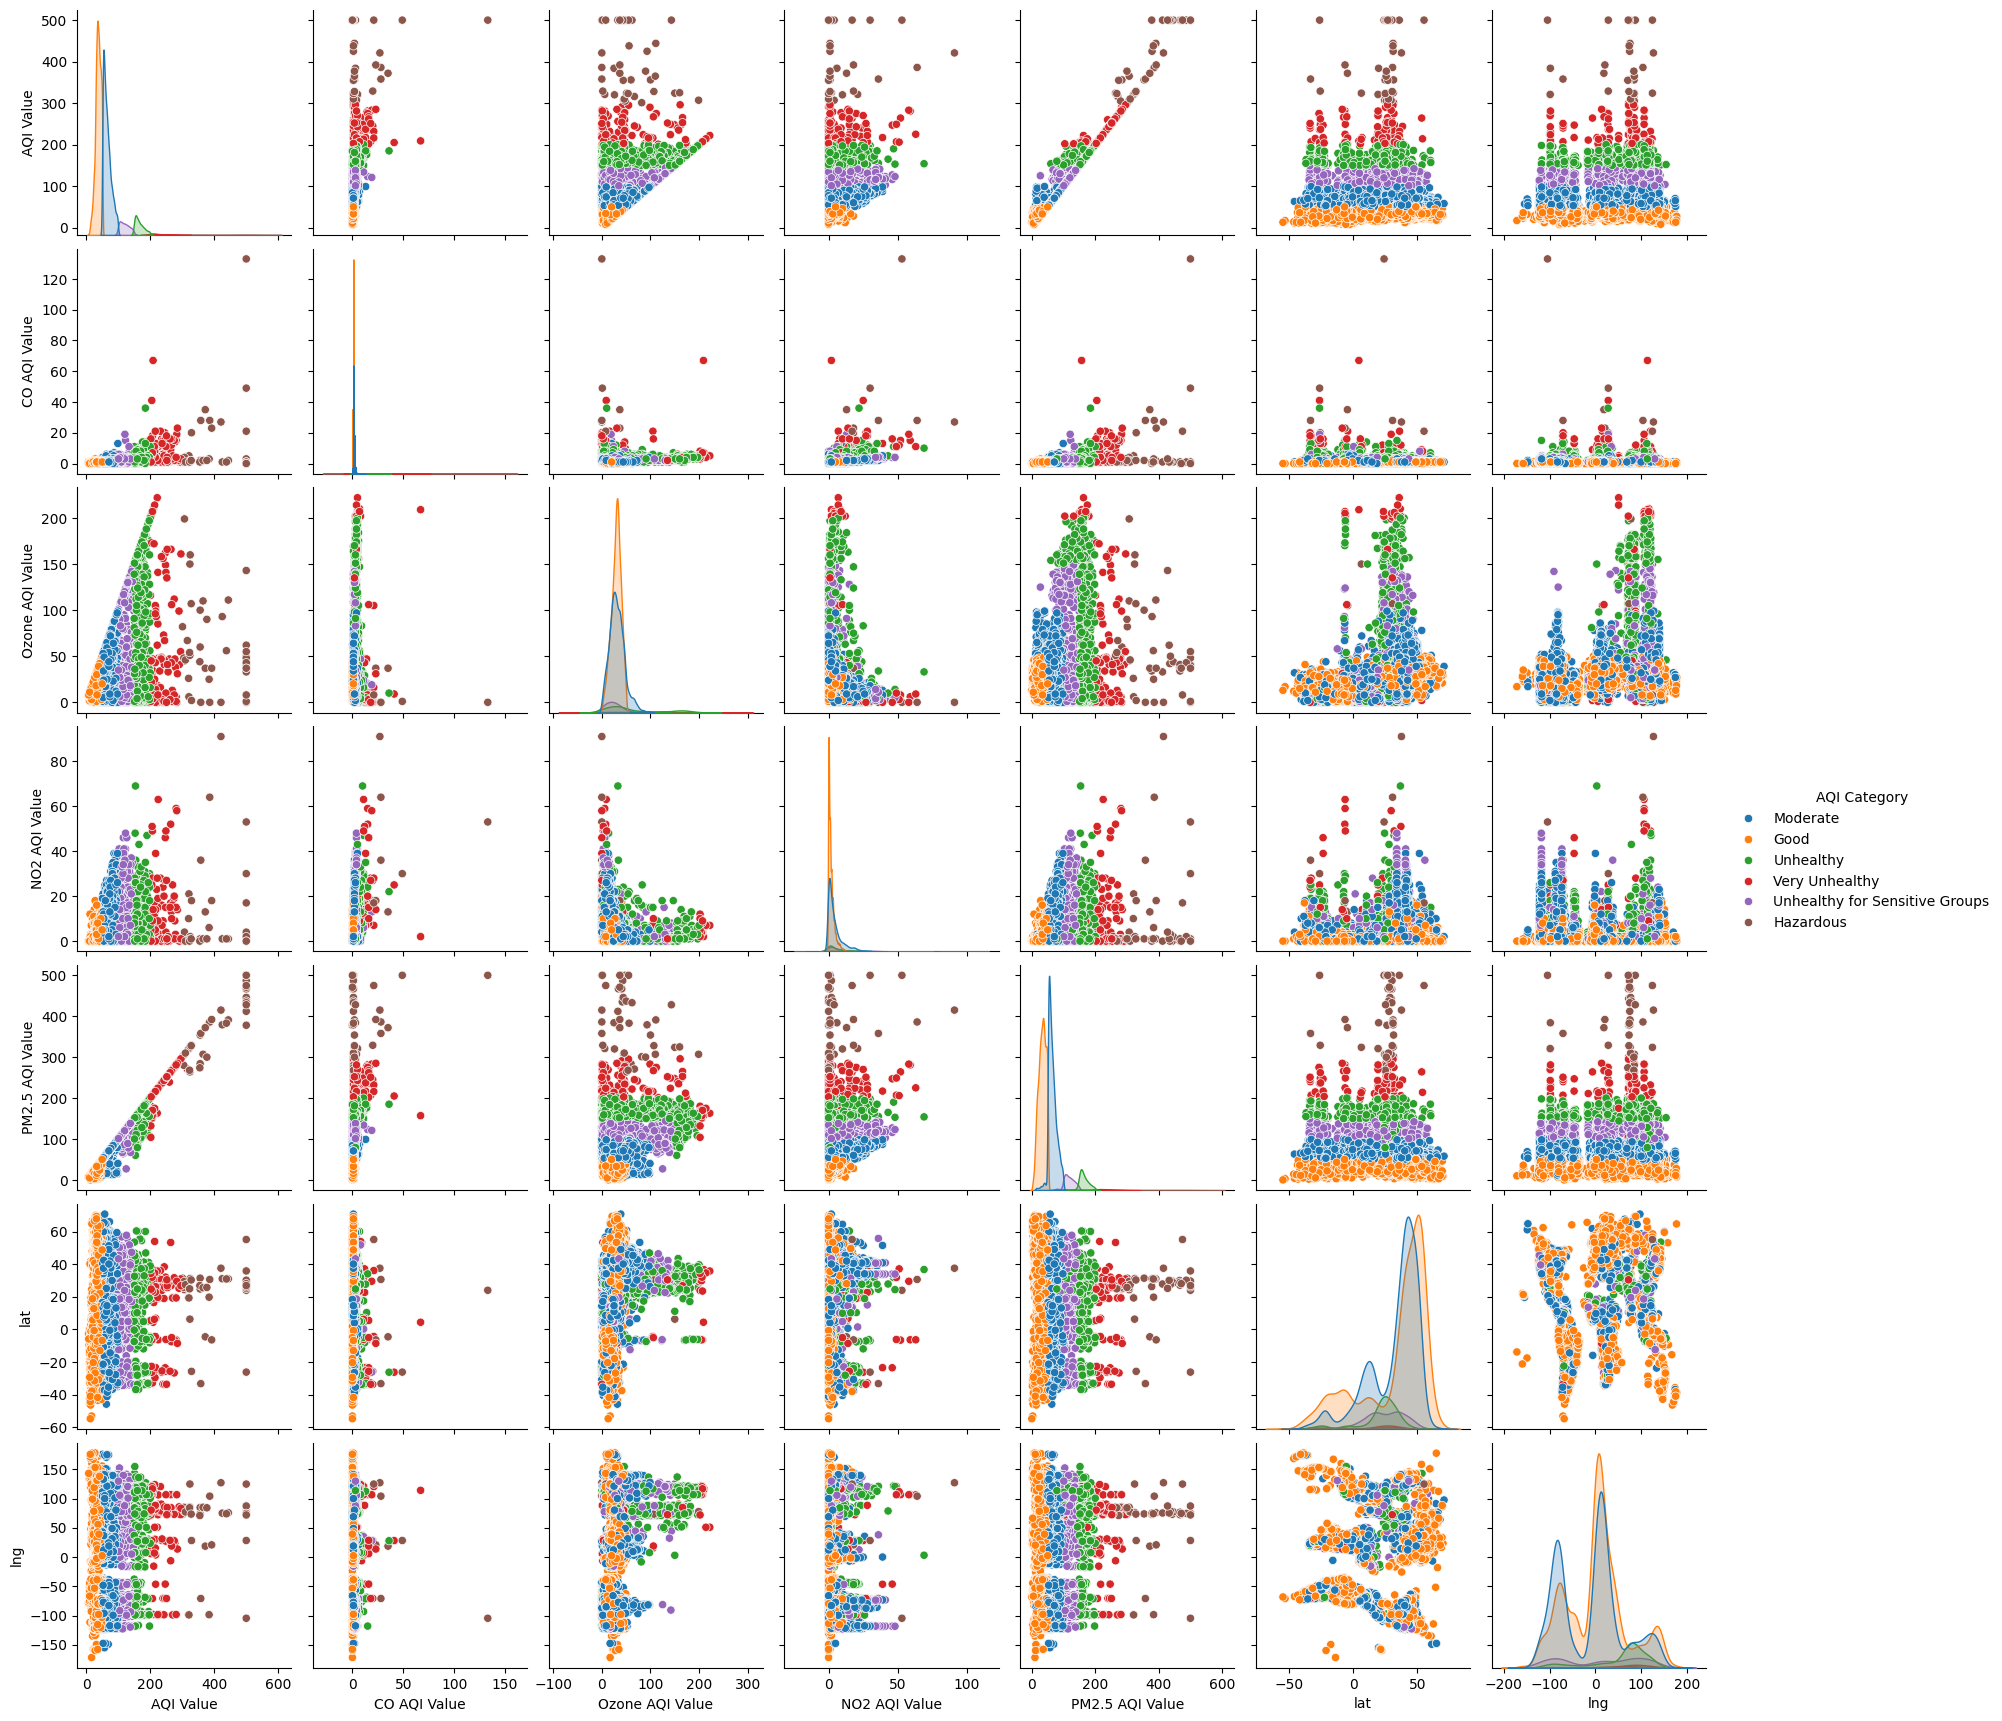

In [359]:
plt.figure(figsize=(25,18))
sns.pairplot(df, hue='AQI Category')
plt.show()

In [360]:
from  matplotlib import colormaps
print(colormaps)

ColormapRegistry; available colormaps:
'magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'grey', 'gist_grey', 'gist_yerg', 'Grays', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted

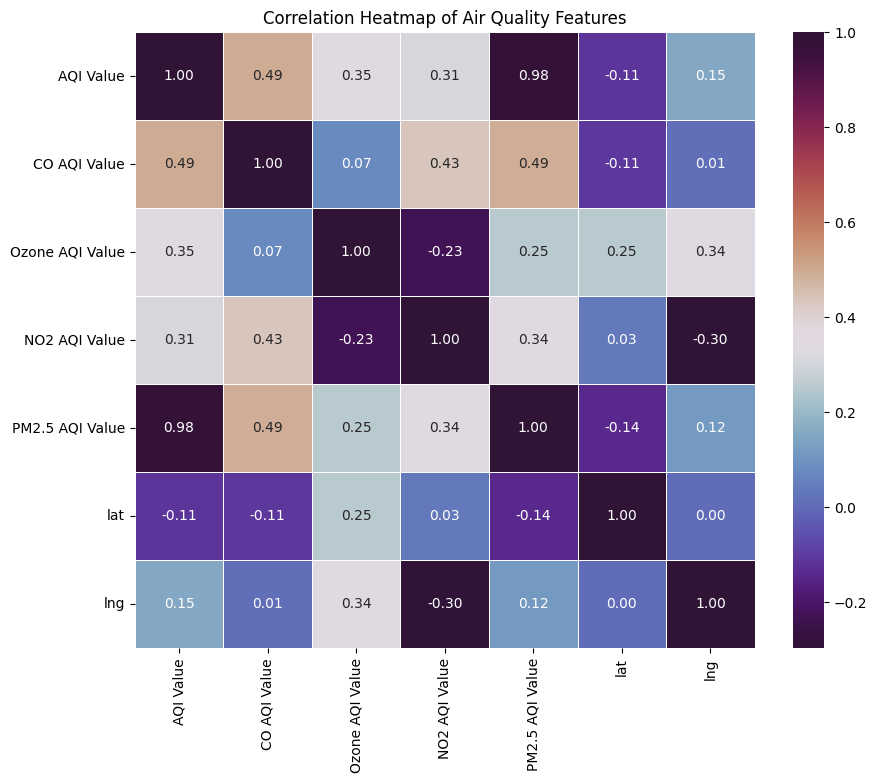

In [361]:



# filtering the columns and only keeping the numerical ones
numerical_columns = df.select_dtypes(include='number').columns
selected_df = df[numerical_columns]

# Calculate the correlation matrix
corr = selected_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="twilight_shifted", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Air Quality Features")
plt.show()

From the correlation matrix, 
1. The PM2.5 AQI Value is the most highly correlated to the AQI Value
2. The CO AQI Value is the second highest correlated feature
3. Ozone AQI Value has the third highest correlation index
3. NO2 AQI Value has the fourth highest correlated index

The latitude and longitude features have the lowest correlation indexes

In [362]:
df.columns

Index(['Country', 'City', 'AQI Value', 'AQI Category', 'CO AQI Value',
       'CO AQI Category', 'Ozone AQI Value', 'Ozone AQI Category',
       'NO2 AQI Value', 'NO2 AQI Category', 'PM2.5 AQI Value',
       'PM2.5 AQI Category', 'lat', 'lng'],
      dtype='object')

In [363]:
%pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In order to persue further feature selection techniques, we need to first encode the categorical variables, in this case , we will be using **label encoding** which assign san integer to each categorical value of the column

In [364]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
categorical_columns = df.select_dtypes(include='object').columns
for col in categorical_columns:
    df.loc[:, col] = le.fit_transform(df[col])

In [365]:
df.head(8)

Country   City  AQI Value AQI Category  CO AQI Value CO AQI Category  \
0     130  10126         51            2             1               0   
1      22  10140         41            0             1               0   
2      75  10163         66            2             1               0   
3     123  10185         34            0             1               0   
4     166  10243         54            2             1               0   
5      15  10264         64            2             1               0   
6     130  10269         54            2             1               0   
7      33  10286         68            2             2               0   

   Ozone AQI Value Ozone AQI Category  NO2 AQI Value NO2 AQI Category  \
0               36                  0              0                0   
1                5                  0              1                0   
2               39                  0              2                0   
3               34                  0              0                0   
4               14                  0             11                0   
5               29                  0              7                0   
6               41                  0              1                0   
7               68                  1              1                0   

   PM2.5 AQI Value PM2.5 AQI Category      lat       lng  
0               51                  2  44.7444   44.2031  
1               41                  0  -5.2900  -44.4900  
2               66                  2  37.1667   15.1833  
3               20                  0  53.0167   20.8833  
4               54                  2  16.1005  -88.8074  
5               64                  2  51.0761    4.2803  
6               54                  2  44.0500   43.0667  
7               58                  2  21.9500  108.6167

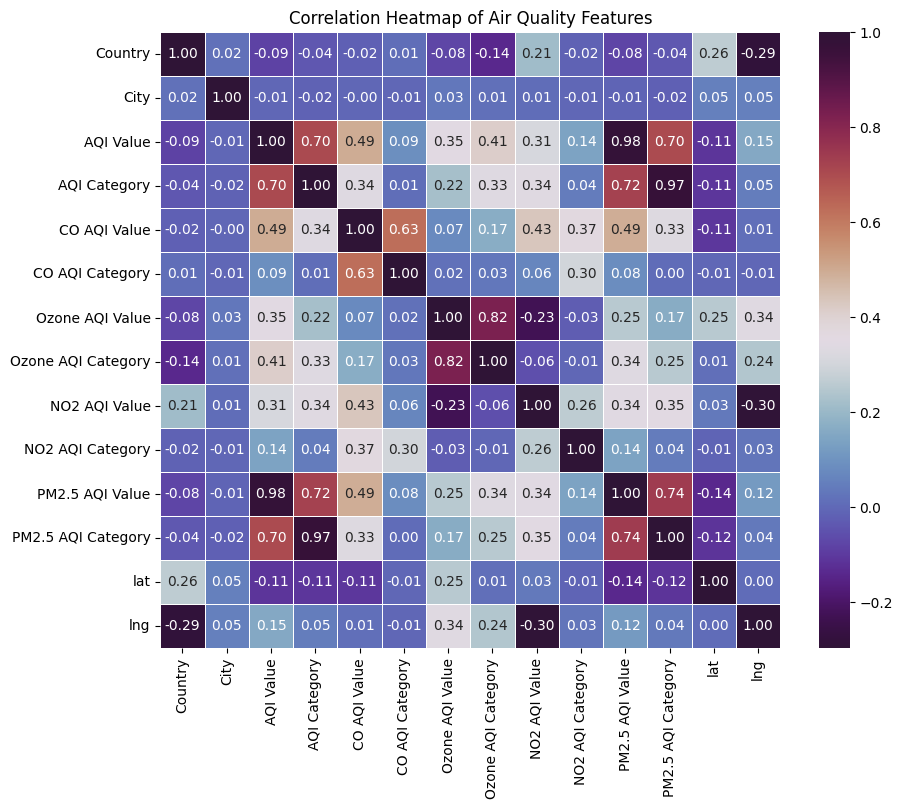

In [366]:
# Calculate the correlation matrix
corr = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="twilight_shifted", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Air Quality Features")
plt.show()

In [367]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Assuming X is your feature matrix and y is your target variable
X = df.drop(['AQI Value', 'AQI Category'], axis=1)
y = df['AQI Category']

X.shape, y.shape


((14229, 12), (14229,))

In [368]:
X.columns

Index(['Country', 'City', 'CO AQI Value', 'CO AQI Category', 'Ozone AQI Value',
       'Ozone AQI Category', 'NO2 AQI Value', 'NO2 AQI Category',
       'PM2.5 AQI Value', 'PM2.5 AQI Category', 'lat', 'lng'],
      dtype='object')

In [369]:

rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(X, y.astype(int))
# extract feature importances
feature_importances = rf_model.feature_importances_
# argort the indices by importance
sorted_indices = np.argsort(feature_importances)[::-1]
for i in sorted_indices:
    print(f"{list(X.columns)[i]}: {round(feature_importances[i], 4)}")

PM2.5 AQI Value: 0.4183
PM2.5 AQI Category: 0.412
Ozone AQI Value: 0.04
CO AQI Value: 0.0394
Ozone AQI Category: 0.0325
lat: 0.0255
NO2 AQI Value: 0.0126
lng: 0.0122
Country: 0.0056
City: 0.0018
NO2 AQI Category: 0.0001
CO AQI Category: 0.0


As per the correlation matrix, the feature importance from random forests classifier gives us similar results , however, in this approach , we also take into consideration the encoded categorical values : 
1. PM2.5 AQI Category
2. PM2.5 AQI Value
4. CO AQI Value
4.  Ozone AQI Value
5. Ozone AQI Value
6. 
6. 


### Feature Engineering

In [370]:
from sklearn.feature_selection import mutual_info_classif
X = df.drop(columns=['AQI Category','AQI Value'])  # Features
y = df['AQI Category'] 

In [371]:
info_gain = mutual_info_classif(X, y.astype(int))

# structure the features and their respective information gain in a df
ig_df = pd.DataFrame({'Feature': X.columns, 'Information Gain': info_gain})
ig_df = ig_df.sort_values(by='Information Gain', ascending=False)

ig_df

Feature  Information Gain
8      PM2.5 AQI Value          0.989721
9   PM2.5 AQI Category          0.985317
0              Country          0.265573
2         CO AQI Value          0.236114
11                 lng          0.214020
10                 lat          0.192445
4      Ozone AQI Value          0.137808
5   Ozone AQI Category          0.091778
6        NO2 AQI Value          0.080432
1                 City          0.044223
7     NO2 AQI Category          0.001437
3      CO AQI Category          0.000000

In [372]:
list(df.columns)

['Country',
 'City',
 'AQI Value',
 'AQI Category',
 'CO AQI Value',
 'CO AQI Category',
 'Ozone AQI Value',
 'Ozone AQI Category',
 'NO2 AQI Value',
 'NO2 AQI Category',
 'PM2.5 AQI Value',
 'PM2.5 AQI Category',
 'lat',
 'lng']

From the previous analysis, we can conclude the following : 
The least significatn features that we should drop to reduce the model's commplexity and the computational cost : 
- CO AQI Category
- NO2 AQI Category
- City
- lng
- lat

In [373]:
# ONLY RUN ONCE
# cols_to_drop = ['CO AQI Category','NO2 AQI Category','City', 'lng', 'lat', 'AQI Value']
# df = df.drop(cols_to_drop, axis=1)


In [374]:
df.to_csv('../../data/preprocessed_AQI_data.csv', index=False)
print('[PRE-PROCESSED AQI CSV DATA SAVED SUCCESSULLY]')

[PRE-PROCESSED AQI CSV DATA SAVED SUCCESSULLY]


In [375]:
df_ = pd.read_csv('../../data/preprocessed_AQI_data.csv')
df_

Country  AQI Category  CO AQI Value  Ozone AQI Value  \
0          130             2             1               36   
1           22             0             1                5   
2           75             2             1               39   
3          123             0             1               34   
4          166             2             1               14   
...        ...           ...           ...              ...   
14224       33             3             3              160   
14225      166             2             1               34   
14226      140             2             1               39   
14227       54             0             1               20   
14228      166             2             1               44   

       Ozone AQI Category  NO2 AQI Value  PM2.5 AQI Value  PM2.5 AQI Category  
0                       0              0               51                   2  
1                       0              1               41                   0  
2                       0              2               66                   2  
3                       0              0               20                   0  
4                       0             11               54                   2  
...                   ...            ...              ...                 ...  
14224                   2              1               79                   2  
14225                   0              5               54                   2  
14226                   0              1               71                   2  
14227                   0              5               50                   0  
14228                   0              2               71                   2  

[14229 rows x 8 columns]

In [380]:
from sklearn.model_selection import train_test_split
X = df_.drop(['AQI Category'], axis=1)
y = df['AQI Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=22)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(2845, 7) (11384, 7)
(2845,) (11384,)
